# Análise Exploratória de Dados

* Como os valores de alugueis estão distribuidos?
* Existe relação entre o número de quartos e o valor do aluguel?
* O que podemos observar sobre a possibilidade de aceitar animais?
* Qual a relação entre cidades e os números de quartos?
* Imóvel mobiliado impacta no preço do aluguel?
* Como estão distribuidos os imóveis por número de banheiros?
* Existe alguma relação entre o número de vagas de garagem e o valor do aluguel?
* E o seguro incêndio?
* Existe qualquer impacto do valor do iptu em relação ao valor imóvel?

Importando as bibliotecas necessárias

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

### Carregando a Base de Dados

Os dados foram transformados usando o airflow, basicamente o script copiava a base de dados para outro banco chamado 'imoveis_dw.db', com os dados transformado para realizar nossas análises.

In [76]:
connect_dw_imoveis = sqlite3.connect("../data/imoveis_dw.db")

In [77]:
#usando o metodo do pandas para ler dados sql
data = pd.read_sql_query(r"""
    SELECT * FROM IMOVEIS
    """, 
    connect_dw_imoveis
    )

In [78]:
data.head()

cidade estado  area  num_quartos  num_banheiros  garagem  \
0     São Paulo     SP    70            2              1        1   
1     São Paulo     SP   320            4              4        0   
2  Porto Alegre     RS    80            1              1        1   
3  Porto Alegre     RS    51            2              1        0   
4     São Paulo     SP    25            1              1        0   

   num_andares  aceita_animais  mobilia  valor_aluguel  valor_condominio  \
0            7               1        1           3300              2065   
1           20               1        0           4960              1200   
2            6               1        0           2800              1000   
3            2               1        0           1112               270   
4            1               0        0            800                 0   

   valor_iptu  valor_seguro_incendio  
0         211                     42  
1        1750                     63  
2           0                     41  
3          22                     17  
4          25                     11

Exibindo as informações da base de dados

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   cidade                 10692 non-null  object
 1   estado                 10692 non-null  object
 2   area                   10692 non-null  int64 
 3   num_quartos            10692 non-null  int64 
 4   num_banheiros          10692 non-null  int64 
 5   garagem                10692 non-null  int64 
 6   num_andares            10692 non-null  int64 
 7   aceita_animais         10692 non-null  int64 
 8   mobilia                10692 non-null  int64 
 9   valor_aluguel          10692 non-null  int64 
 10  valor_condominio       10692 non-null  int64 
 11  valor_iptu             10692 non-null  int64 
 12  valor_seguro_incendio  10692 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.1+ MB


### Análise Estatística Básica.

- valores muito anômalos referente ao valor do aluguel, area e numero de andares.

In [80]:
data.describe()

area   num_quartos  num_banheiros       garagem   num_andares  \
count  10692.000000  10692.000000   10692.000000  10692.000000  10692.000000   
mean     149.217920      2.506079       2.236813      1.609147      5.298167   
std      537.016942      1.171266       1.407198      1.589521      5.888747   
min       11.000000      1.000000       1.000000      0.000000      1.000000   
25%       56.000000      2.000000       1.000000      0.000000      1.000000   
50%       90.000000      2.000000       2.000000      1.000000      3.000000   
75%      182.000000      3.000000       3.000000      2.000000      8.000000   
max    46335.000000     13.000000      10.000000     12.000000    301.000000   

       aceita_animais       mobilia  valor_aluguel  valor_condominio  \
count    10692.000000  10692.000000   10692.000000      1.069200e+04   
mean         0.777778      0.243734    3896.247194      1.174022e+03   
std          0.415759      0.429354    3408.545518      1.559231e+04   
min          0.000000      0.000000     450.000000      0.000000e+00   
25%          1.000000      0.000000    1530.000000      1.700000e+02   
50%          1.000000      0.000000    2661.000000      5.600000e+02   
75%          1.000000      0.000000    5000.000000      1.237500e+03   
max          1.000000      1.000000   45000.000000      1.117000e+06   

          valor_iptu  valor_seguro_incendio  
count   10692.000000           10692.000000  
mean      366.704358              53.300879  
std      3107.832321              47.768031  
min         0.000000               3.000000  
25%        38.000000              21.000000  
50%       125.000000              36.000000  
75%       375.000000              68.000000  
max    313700.000000             677.000000

### Verificando a correlação dos atributos

#### itens com maior Correlação positiva referente ao valor do aluguel

1. seguro incendio
2. num_banheiro
3. Garagem
4. num_quartos

<AxesSubplot:>

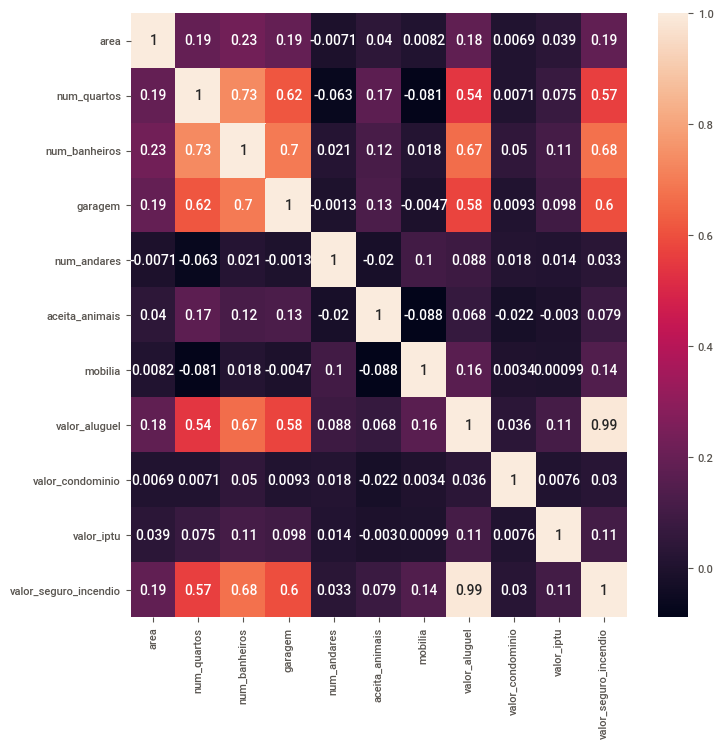

In [81]:
plt.figure(figsize =(8,8))
cor = data.corr()
sns.heatmap(cor,annot =True)

Visualizando as correlações em pares

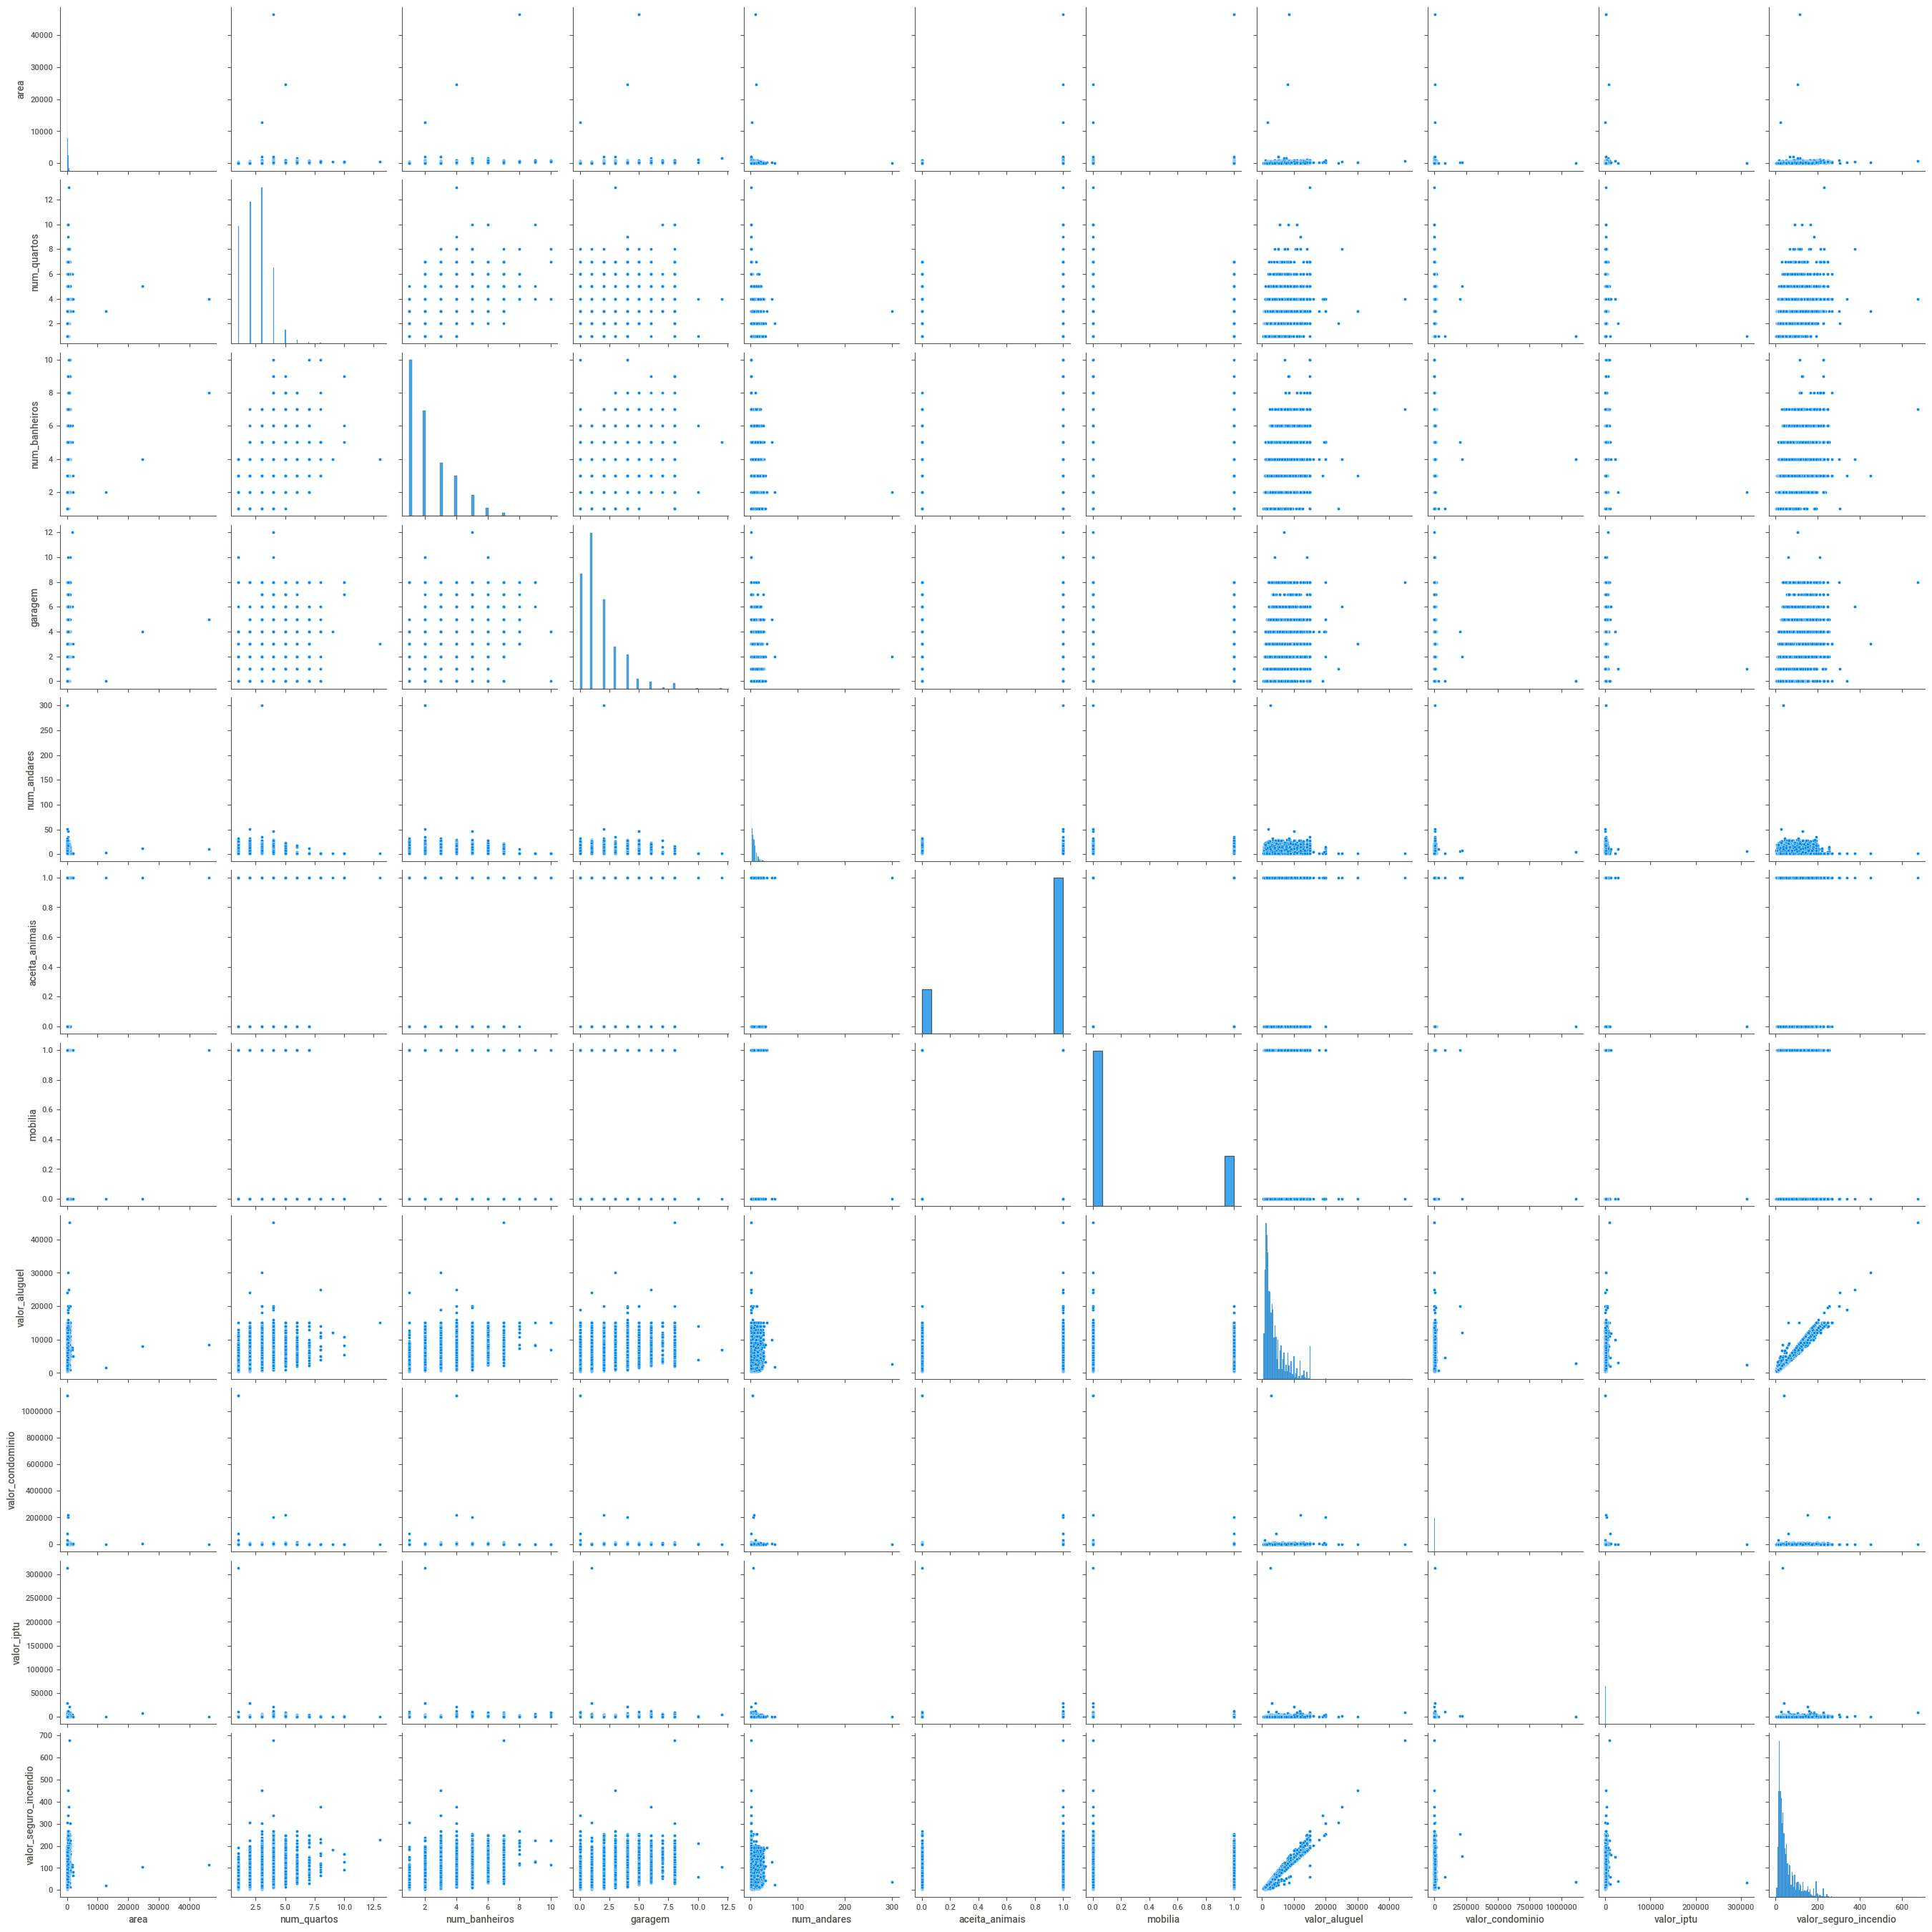

In [82]:
sns.pairplot(data)

'!' permite que você utilize comandos de nivel do sistema operacional

In [83]:
!pip install sweetviz

### Gerar Gráficos sweetviz

no exemplo abaixo gera um gráfico mostrando a relação do valor do aluguel com os outros atriutos.

In [84]:
import sweetviz as sv

my_report = sv.analyze(data,"valor_aluguel")
#abrir no navegador
my_report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



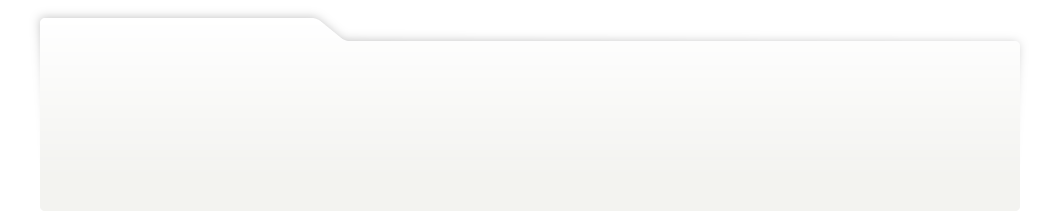
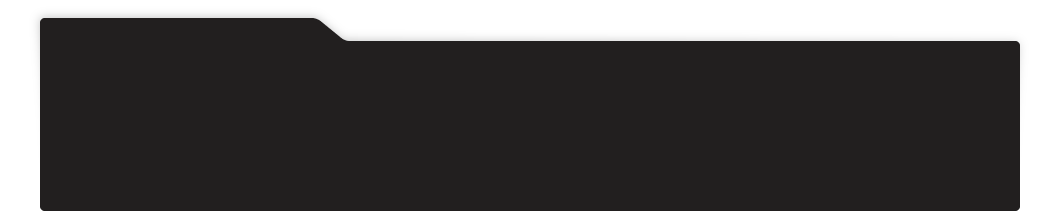
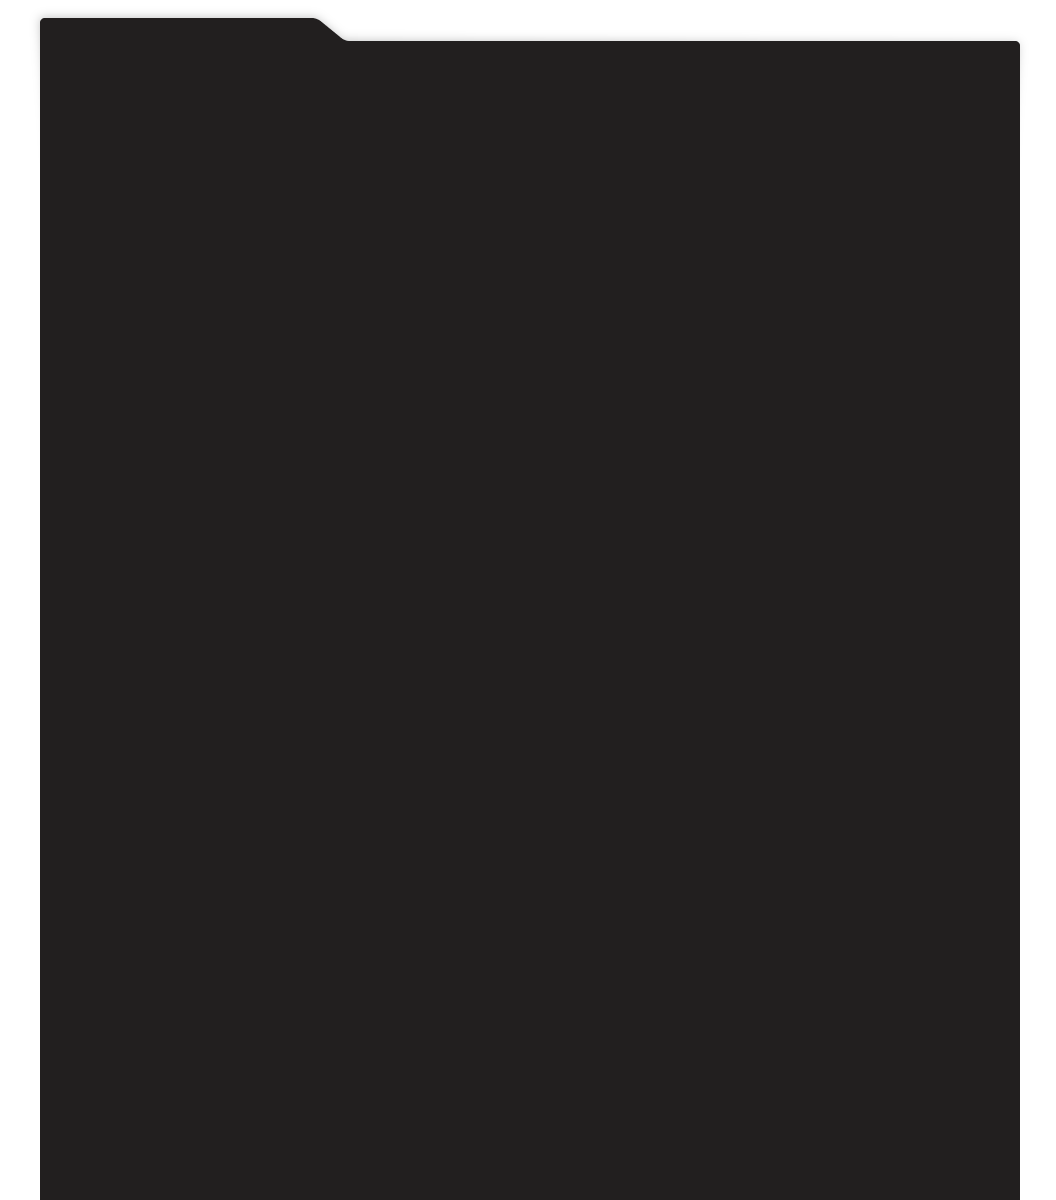
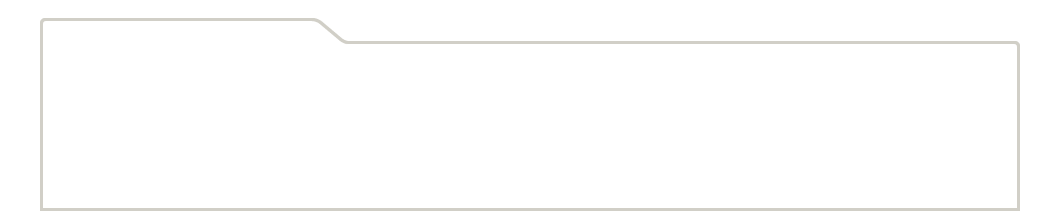
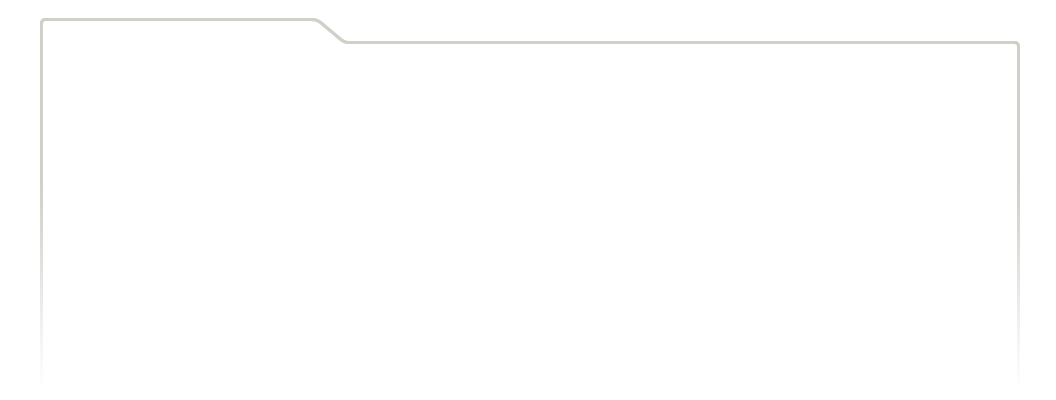
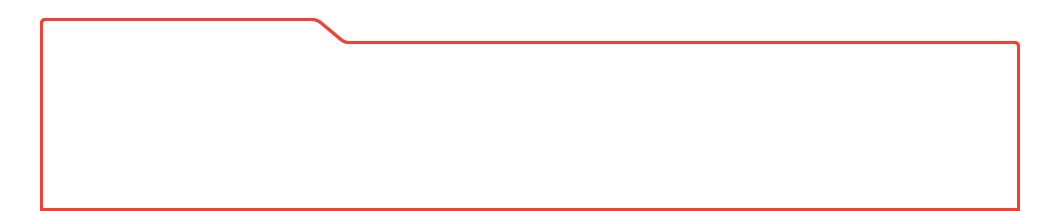
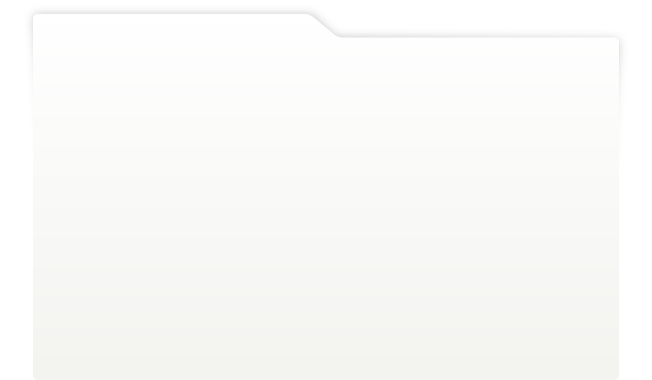
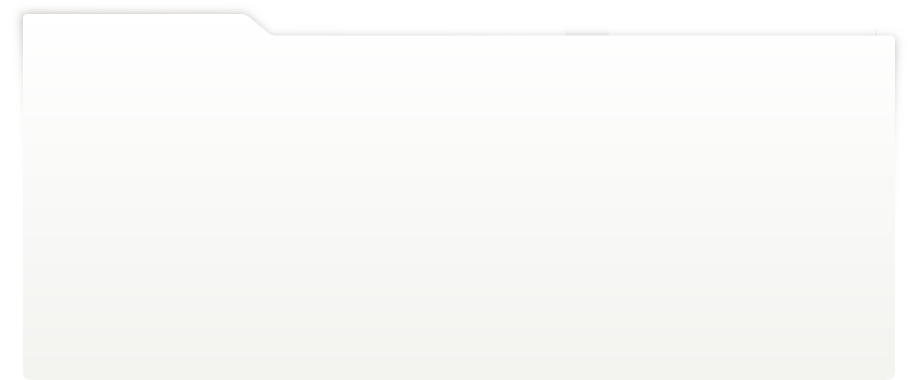
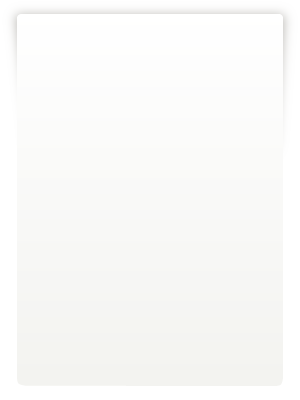
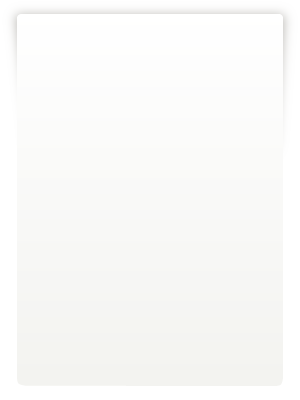
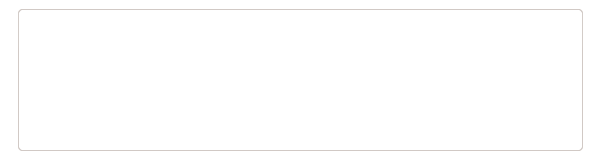
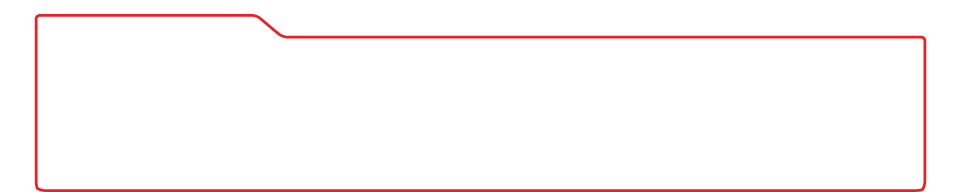
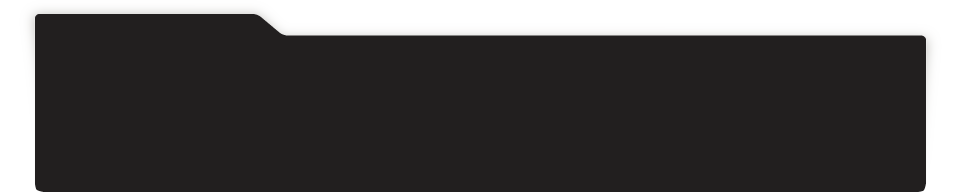
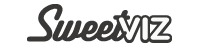
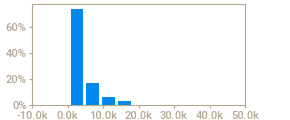
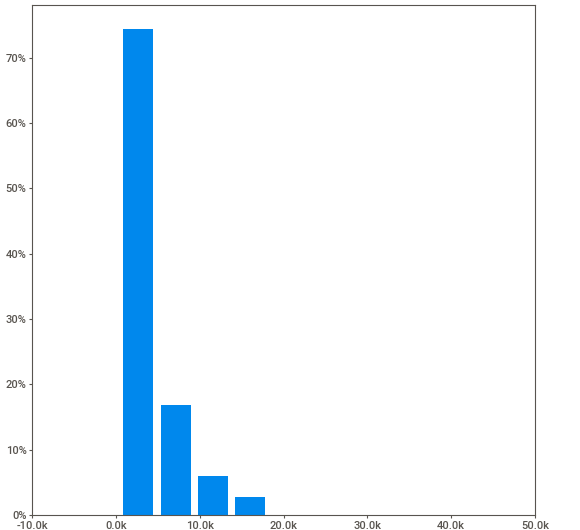
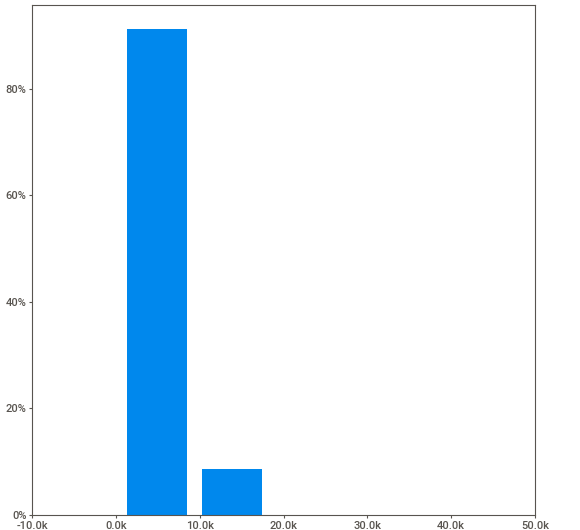
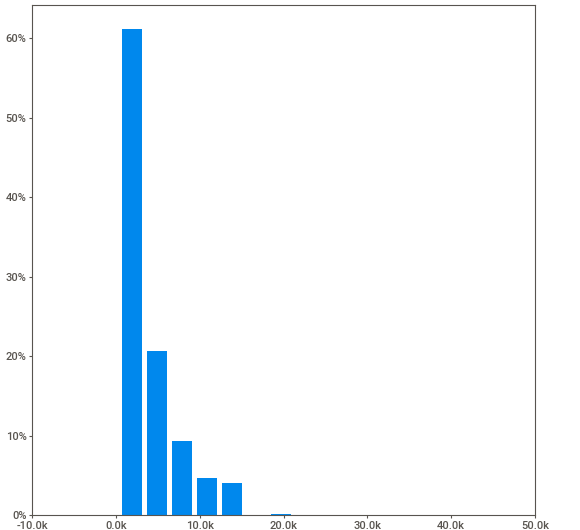
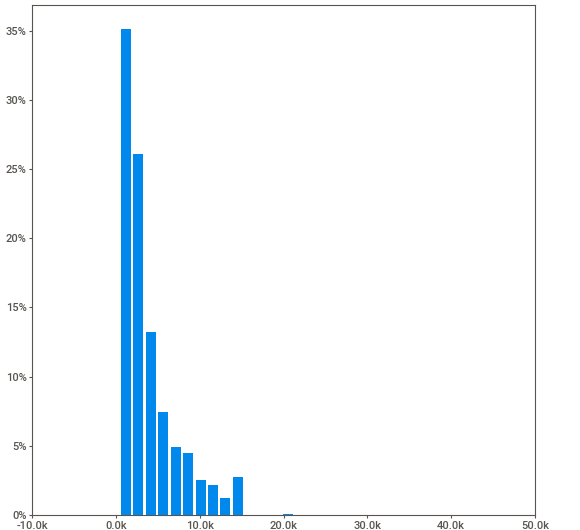
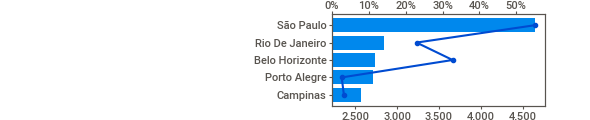
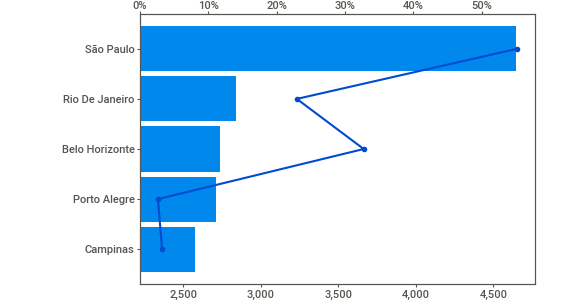
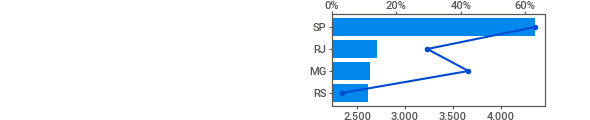
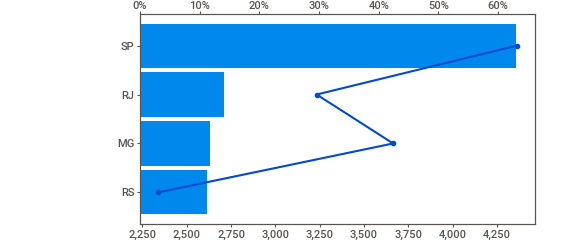
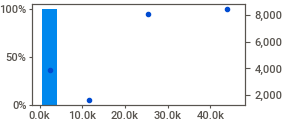
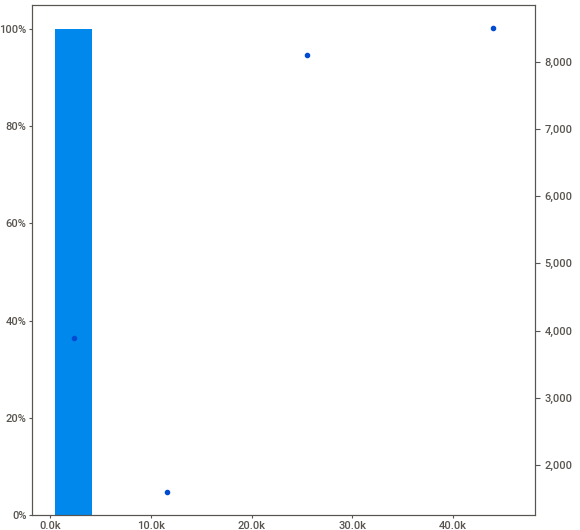
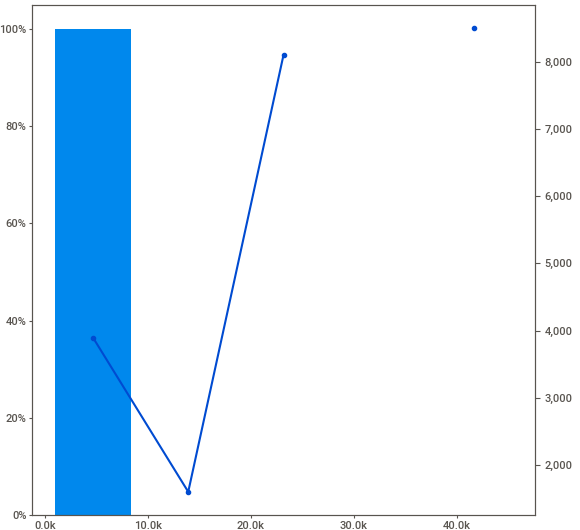
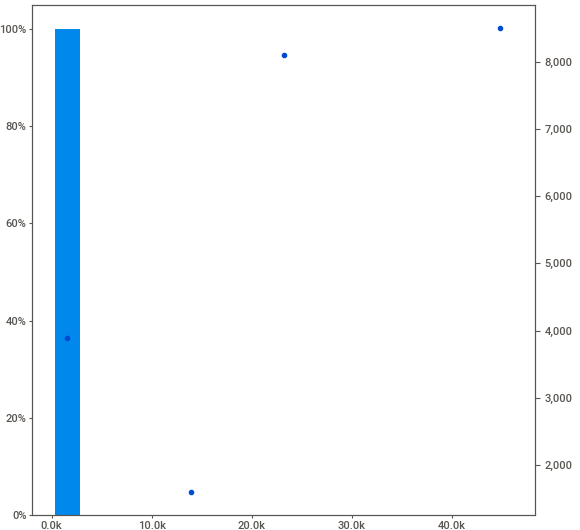
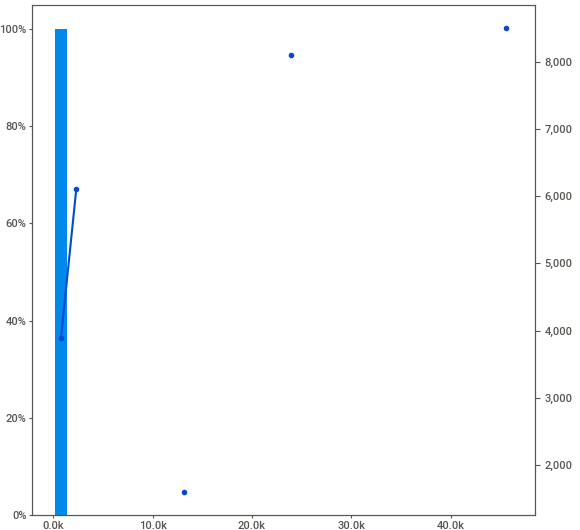
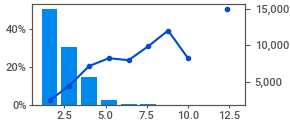
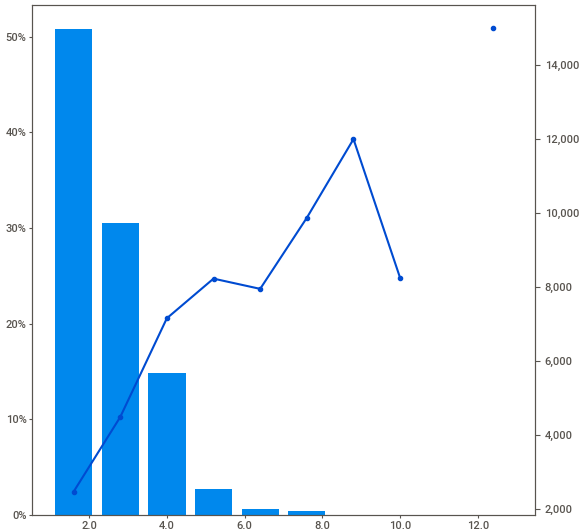
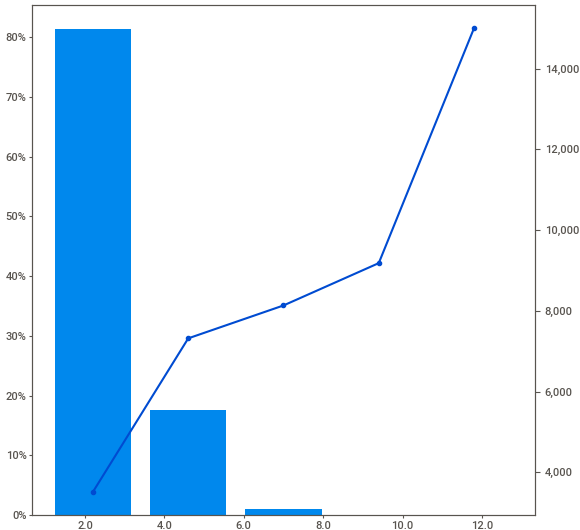
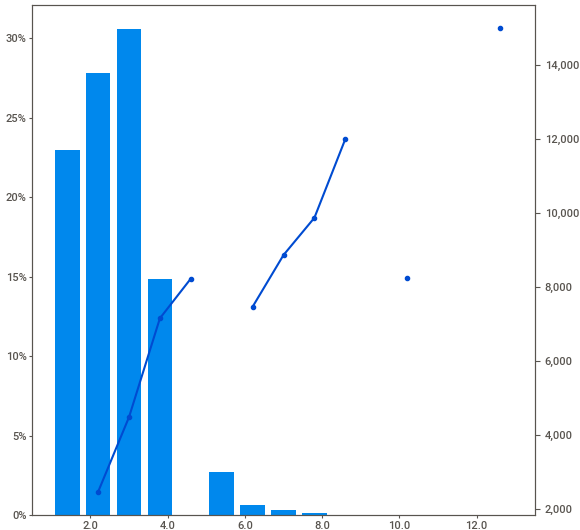
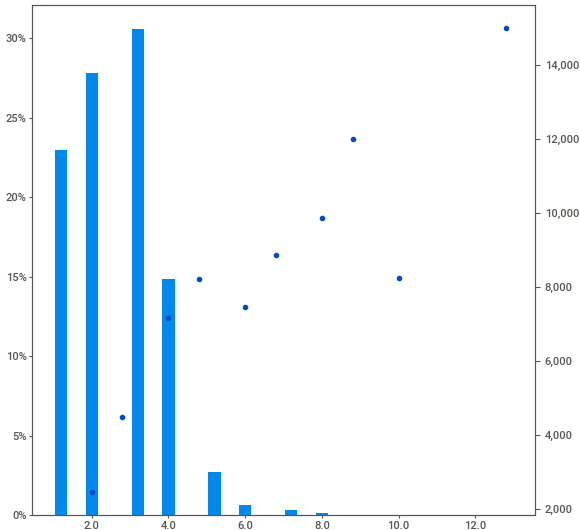
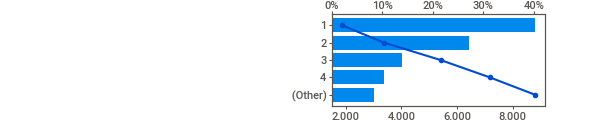
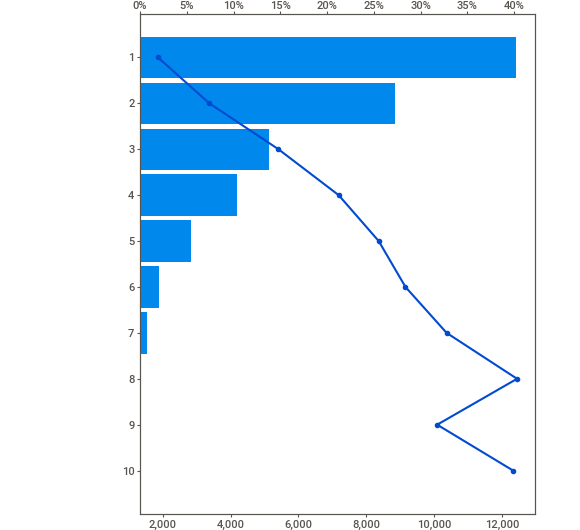
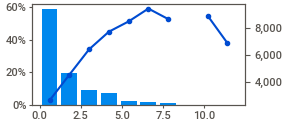
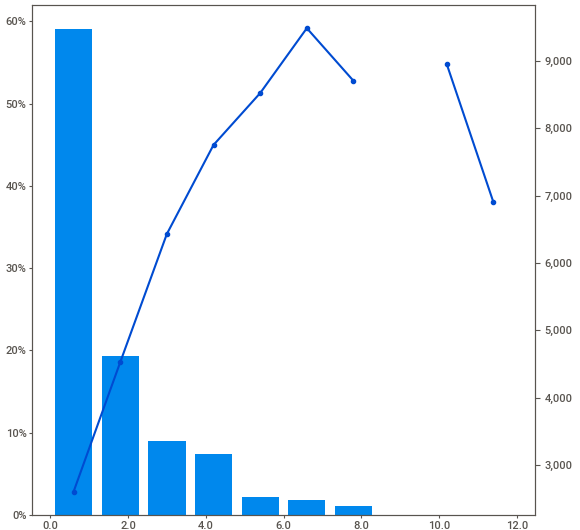
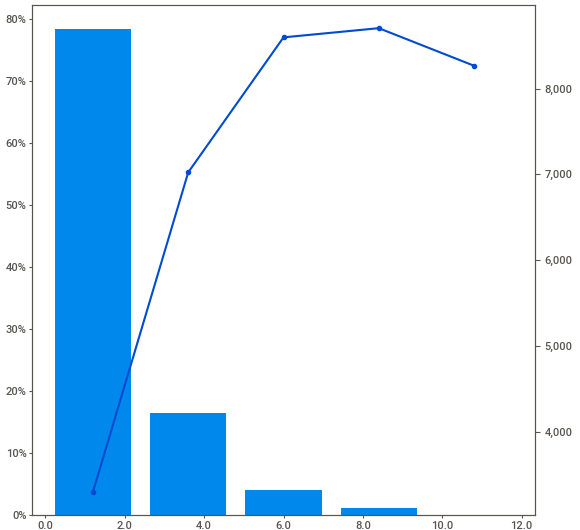
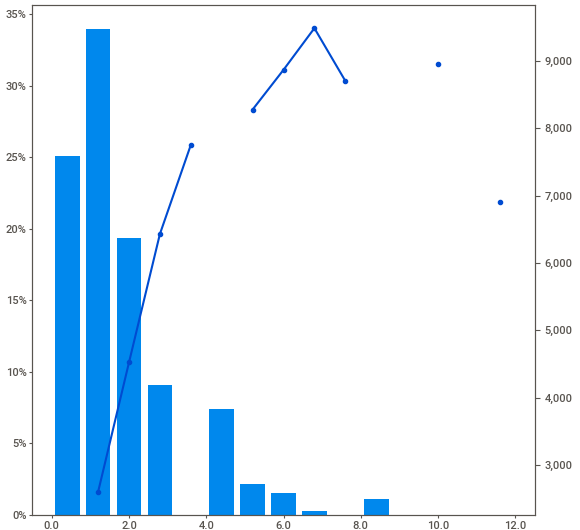
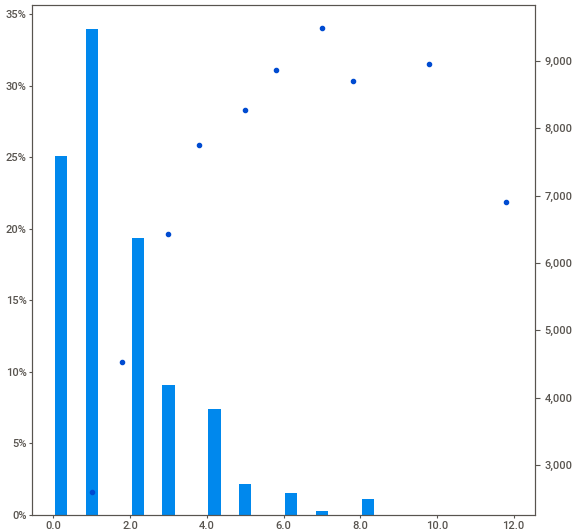
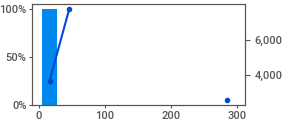
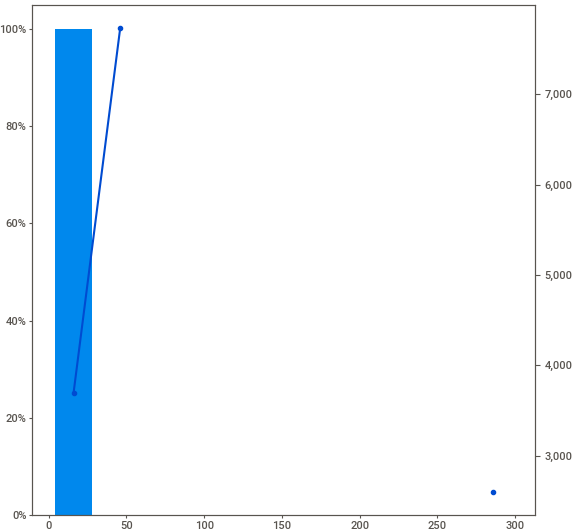
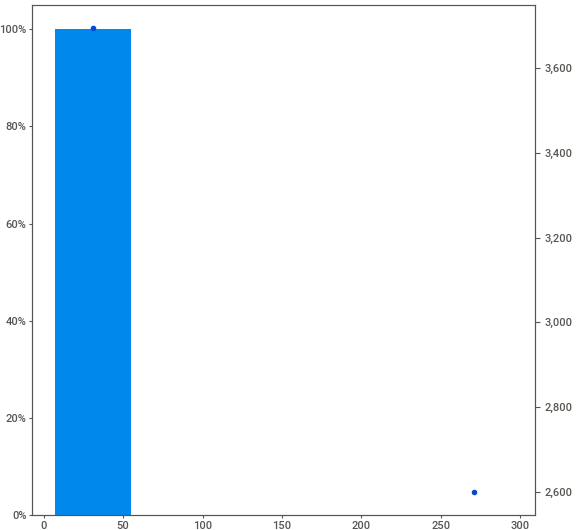
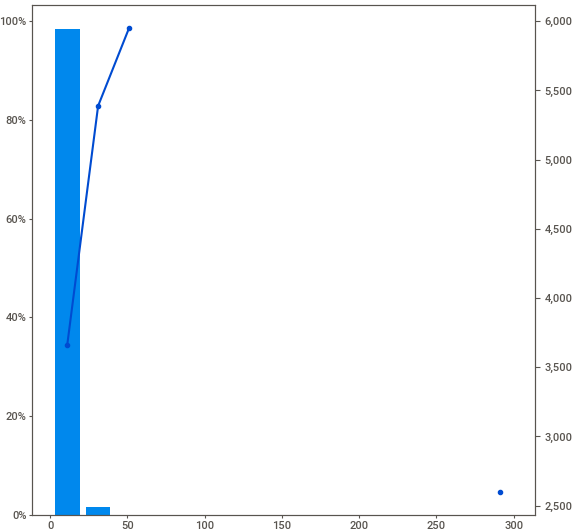
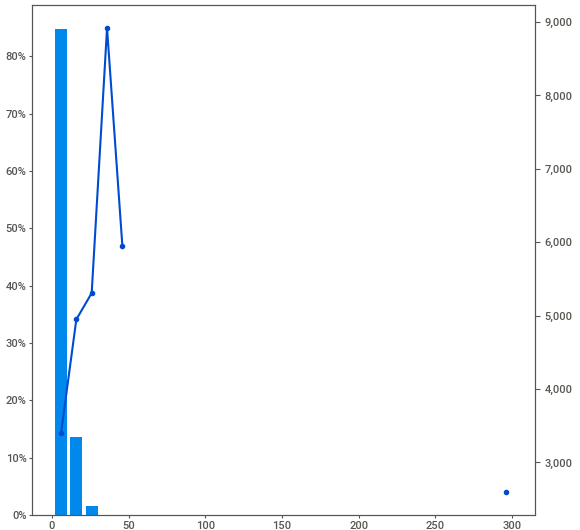
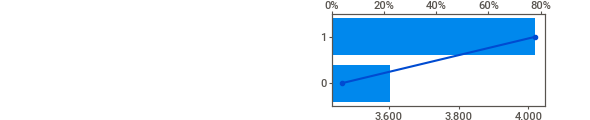
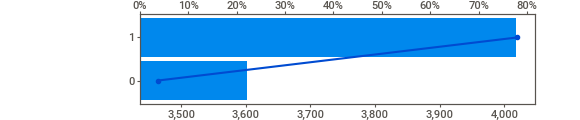
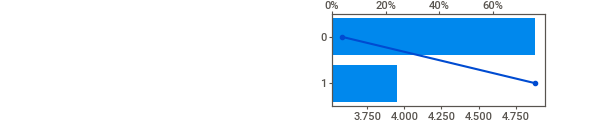
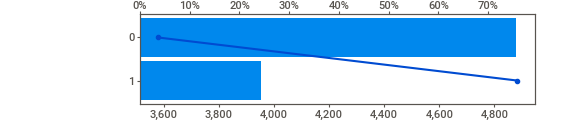
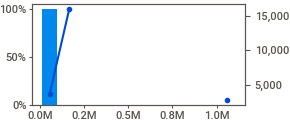
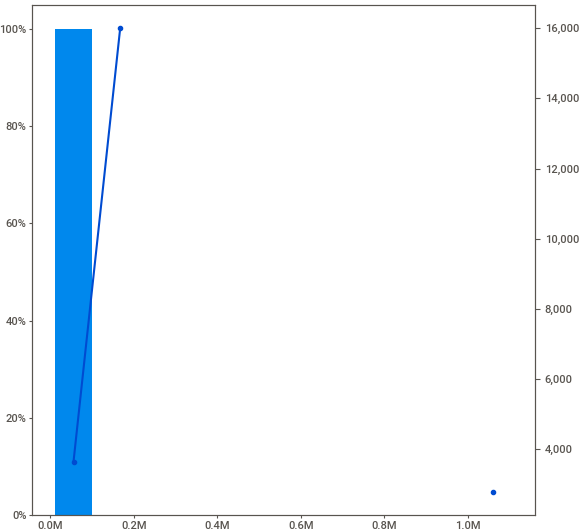
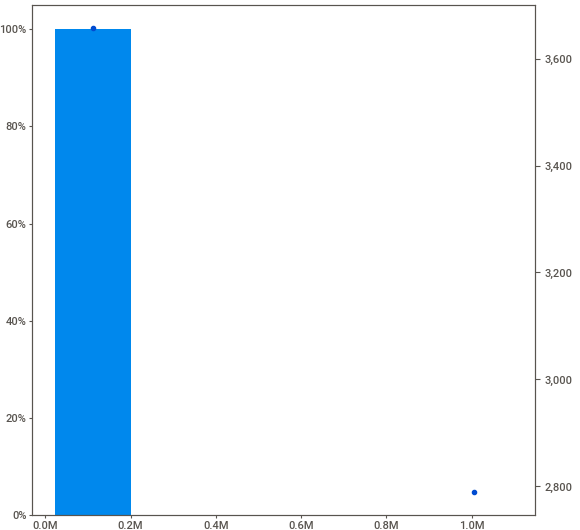
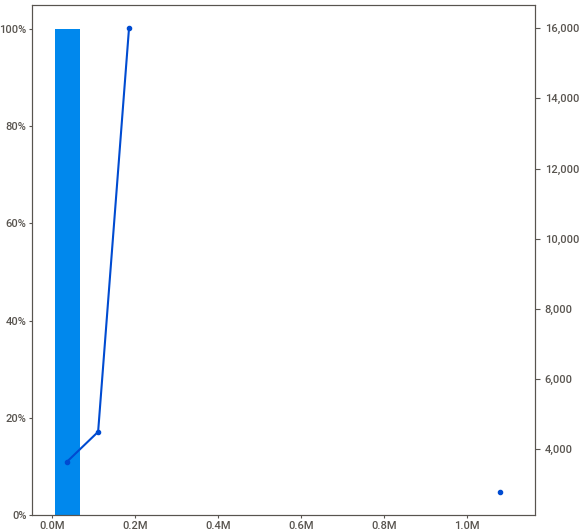
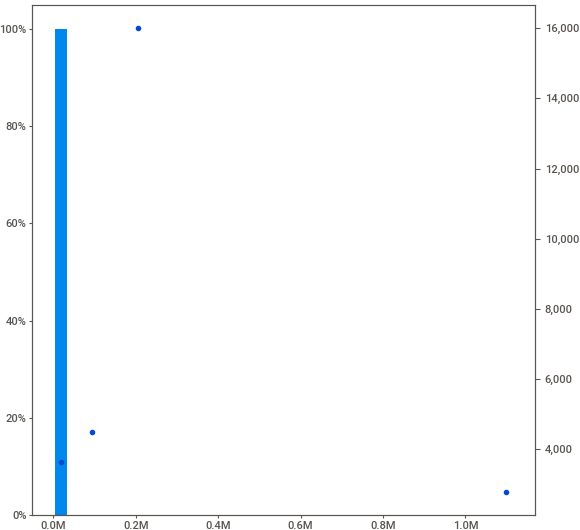
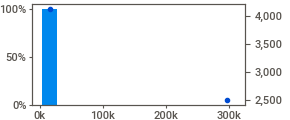
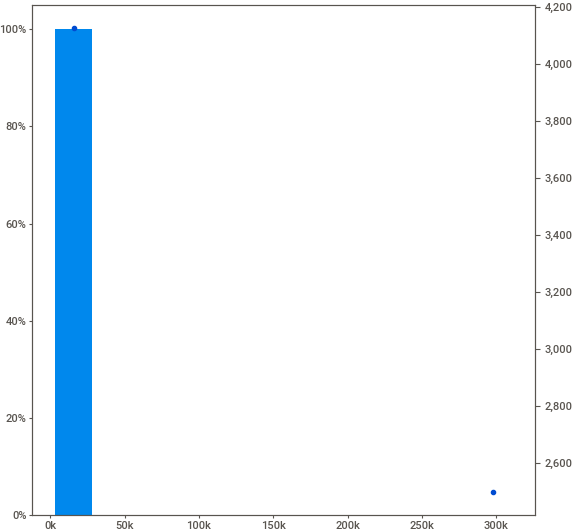
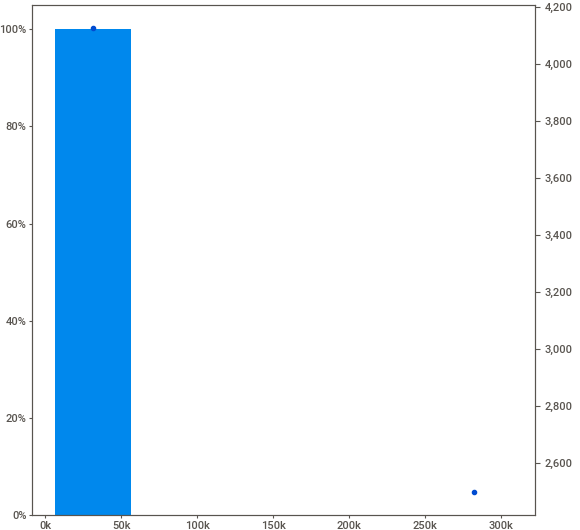
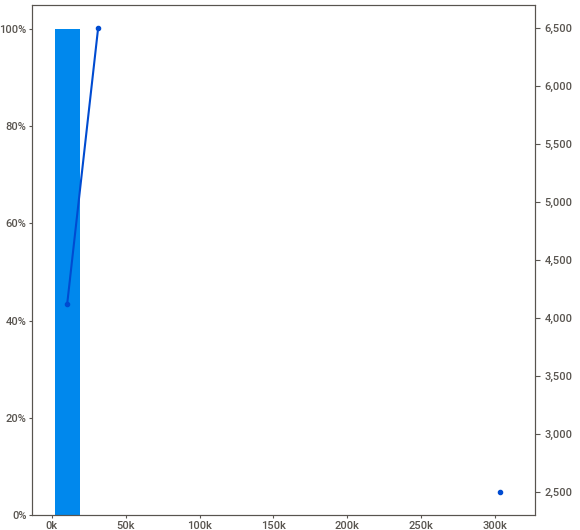
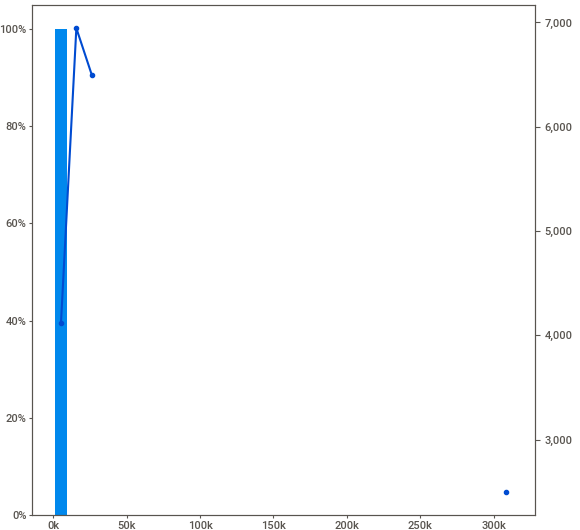
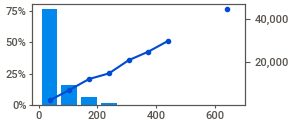
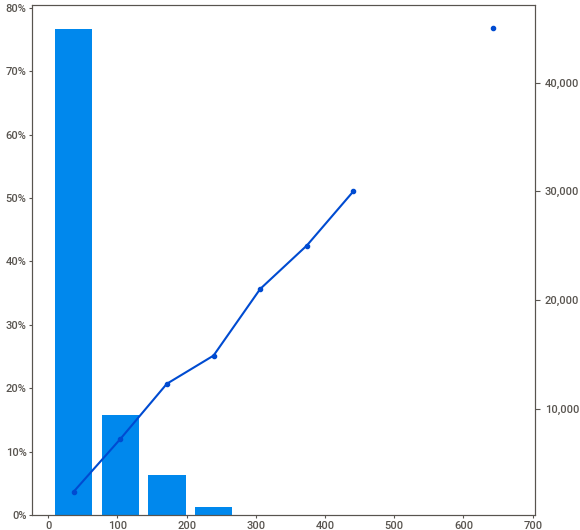
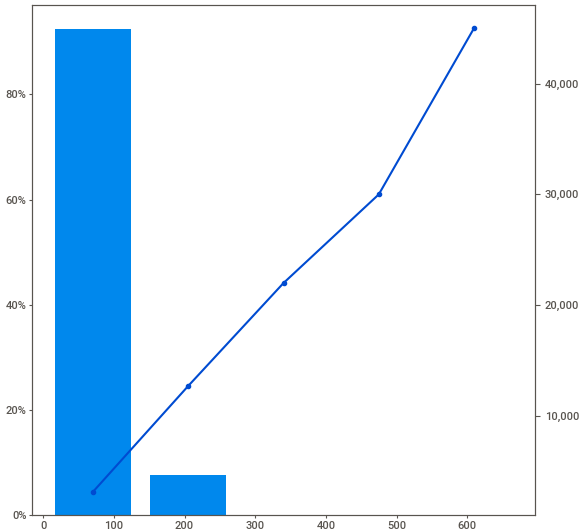
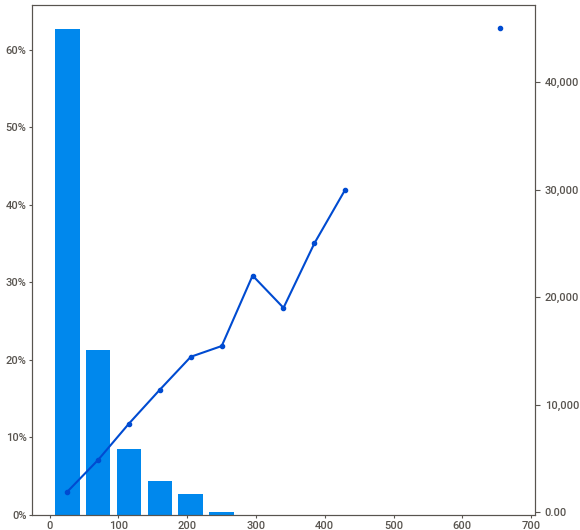
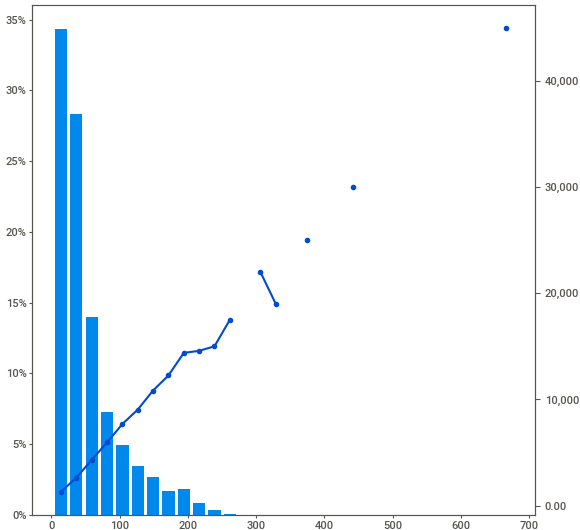
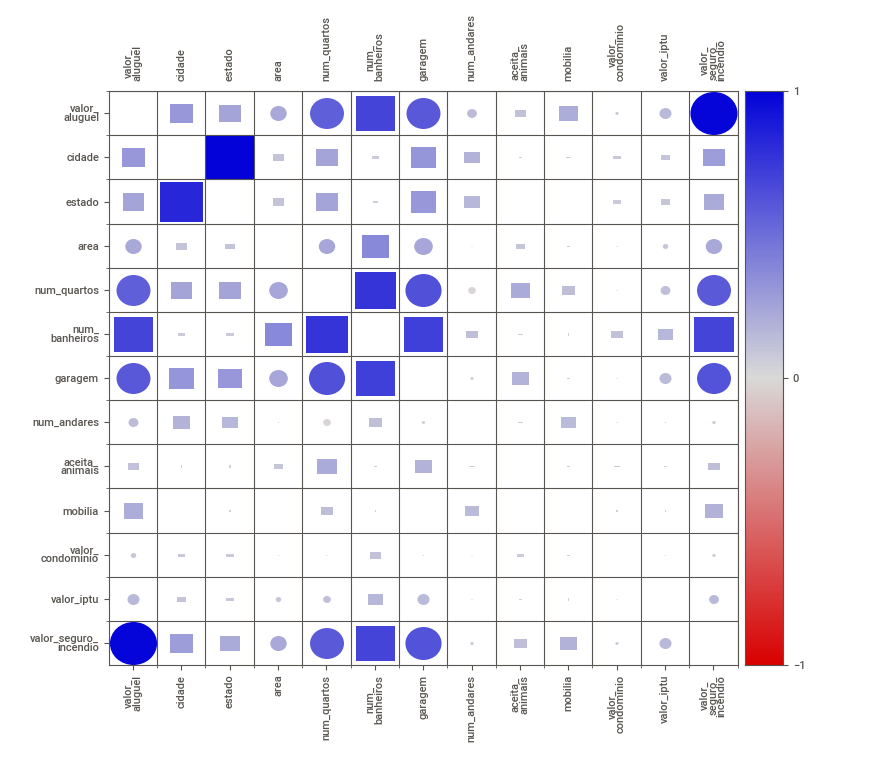
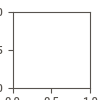

In [85]:
# abrir no nooebook
my_report.show_notebook()

# Como os valores de aluguel estão distribuidos?

### Intalando o plotly para visualizações dinamicas

In [86]:
!pip3 install plotly

O gráfico abaixo exibe como está distribuido o valor do aluguel de acordo com os imóveis 

In [87]:
import plotly.express as px
fig = px.histogram(data, x="valor_aluguel", marginal="rug", hover_data=data.columns)
fig.show()


o gráfico a baixo mostra a dispersão dos dados referente ao valor do aluguel.

In [88]:
import plotly.express as px
fig = px.box(data, x="valor_aluguel", points="all")
fig.show()

Alguns insigths identificados...<br/>
1. Dados com uma assimetria positiva. <br/>
2. Possíveis outliers acima de 15.000,00. <br/>
3. A maioria dos valores estão na faixa de R$ 499 à 10.000,00.

<AxesSubplot:xlabel='valor_aluguel'>

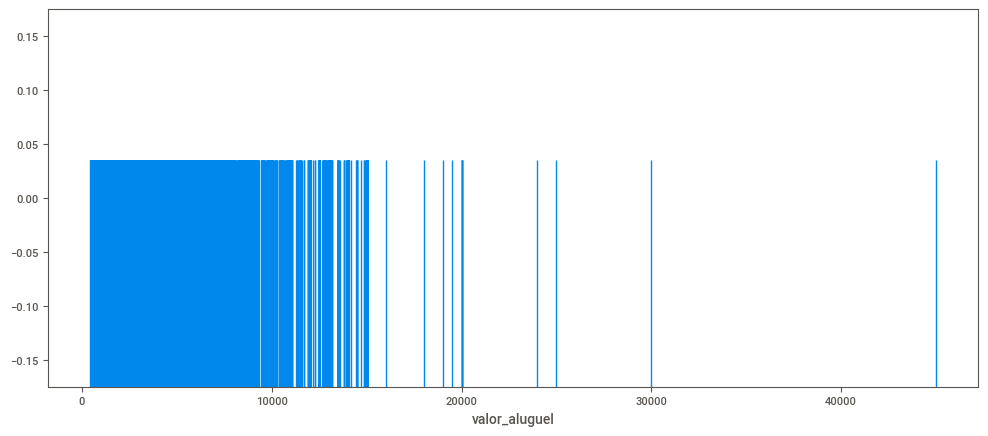

In [89]:
plt.figure(figsize =(12,5))
sns.rugplot(
            data['valor_aluguel'],
            height=0.6,    
            )

# Existe qualquer relação entre o número de quartos e o valor do aluguel?

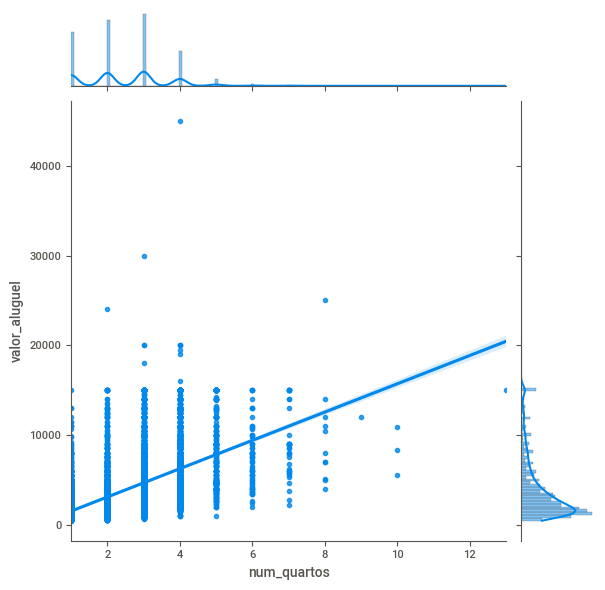

In [90]:
sns.jointplot(y= data['valor_aluguel'],x = data['num_quartos'],kind ='reg')

* Podemos observar que o número de quartos influencia no valor do aluguel.
* Os maiores imoveis mais caros são com números de quartos 3 e 4.
* Como uma regra geral temos uma relação positiva entre o número de imóveis e o valor do aluguel.

# O que podemos observar sobre a possibilidade de aceitar animais?

<AxesSubplot:xlabel='aceita_animais', ylabel='count'>

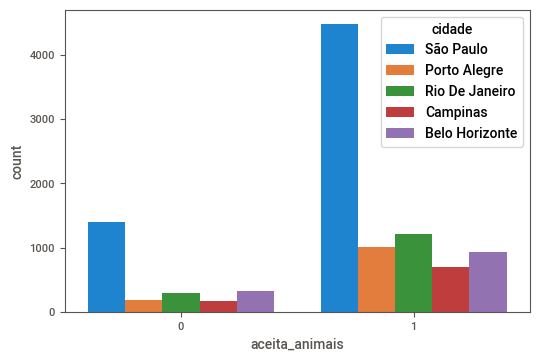

In [91]:
sns.countplot(x = data['aceita_animais']
              ,hue = data['cidade'])

In [92]:
data.head()

cidade estado  area  num_quartos  num_banheiros  garagem  \
0     São Paulo     SP    70            2              1        1   
1     São Paulo     SP   320            4              4        0   
2  Porto Alegre     RS    80            1              1        1   
3  Porto Alegre     RS    51            2              1        0   
4     São Paulo     SP    25            1              1        0   

   num_andares  aceita_animais  mobilia  valor_aluguel  valor_condominio  \
0            7               1        1           3300              2065   
1           20               1        0           4960              1200   
2            6               1        0           2800              1000   
3            2               1        0           1112               270   
4            1               0        0            800                 0   

   valor_iptu  valor_seguro_incendio  
0         211                     42  
1        1750                     63  
2           0                     41  
3          22                     17  
4          25                     11

* Podemos observar que o número de imóveis que aceitam animais é bem maior do que os que não aceitam.

In [93]:
data["animal_categorical"] =  data['aceita_animais'].map({1:"aceita",0:"nao_aceita"})

<AxesSubplot:xlabel='valor_aluguel', ylabel='animal_categorical'>

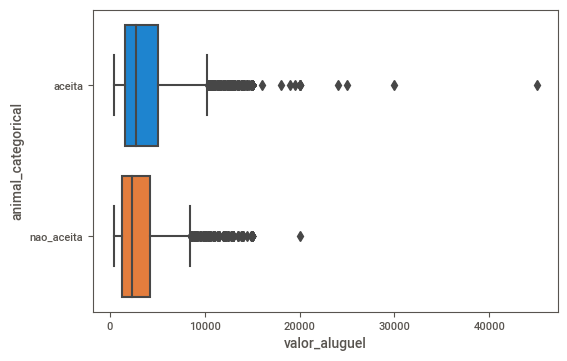

In [94]:
sns.boxplot( x = data['valor_aluguel']
            ,y = data['animal_categorical'])

* A maioria dos imóveis que aceitam animais, custam mais caros do que os que não aceitam.

# Cidades e os números de quartos

In [95]:
pd.DataFrame(data['cidade'].unique())

0
0       São Paulo
1    Porto Alegre
2  Rio De Janeiro
3        Campinas
4  Belo Horizonte

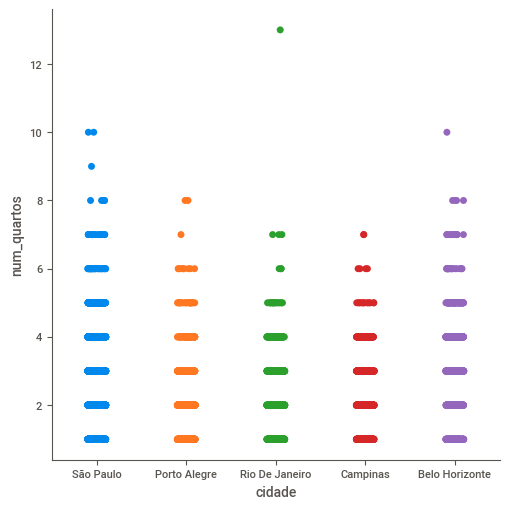

In [96]:
sns.catplot(x='cidade', y='num_quartos', data =data)

* Rio de Janeiro é a cidade com o maior número de quartos.

# Como estão distribuidos os imóveis por número de banheiros?

<AxesSubplot:xlabel='num_banheiros', ylabel='count'>

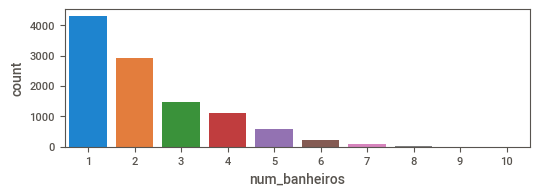

In [97]:
plt.subplot(2,1,1)
sns.countplot(x = data['num_banheiros'])

* A maioria dos imóveis contém de 1 a 2 banheiros.
* Existem poucos imóveis com 5 ou mais banheiros.

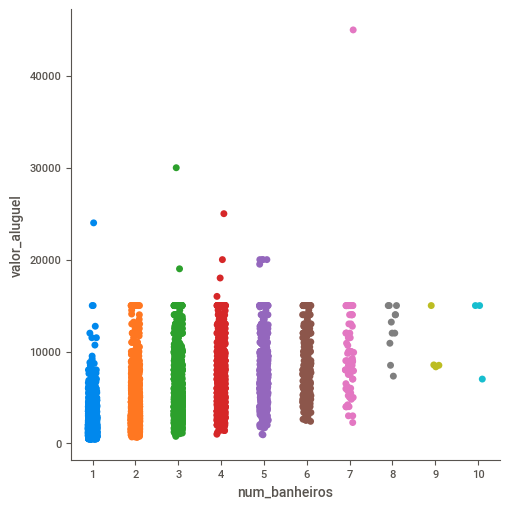

In [98]:
sns.catplot(x ='num_banheiros', y ='valor_aluguel', data = data)

* O maior aluguel é de um imóvel que tem 7 banheiros.
* Existem alugueis caros com imóveis com 1 a 4 banheiros.

# A mobília nos imoveis impactam no valor do aluguel?

In [99]:
data["mobilia_categorical"] =  data['mobilia'].map({1:"mobiliado",0:"nao_mobiliado"})

<AxesSubplot:xlabel='valor_aluguel', ylabel='mobilia_categorical'>

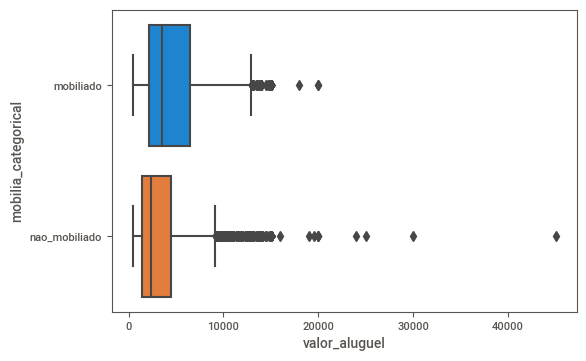

In [100]:
sns.boxplot( x = data['valor_aluguel']
            ,y = data['mobilia_categorical'])

* De todos os imóveis com valores maiores de aluguel, bem acima da média, são todos não mobiliados.
* O que justifica uma fraca correlação entre os atributos.

# Existe alguma relação entre o número de vagas de garagem e o valor do aluguel?

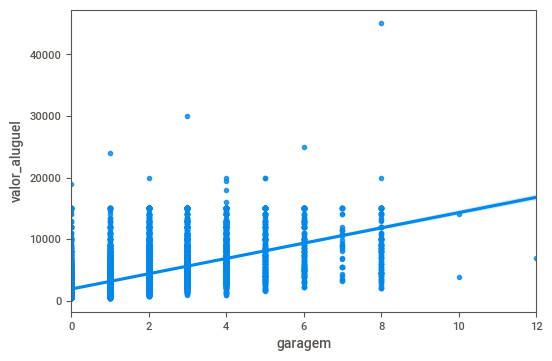

In [101]:
plt.figure(figsize =(6,4))
ax = sns.regplot(x = data['garagem'],y = data['valor_aluguel'])

<Figure size 600x400 with 0 Axes>

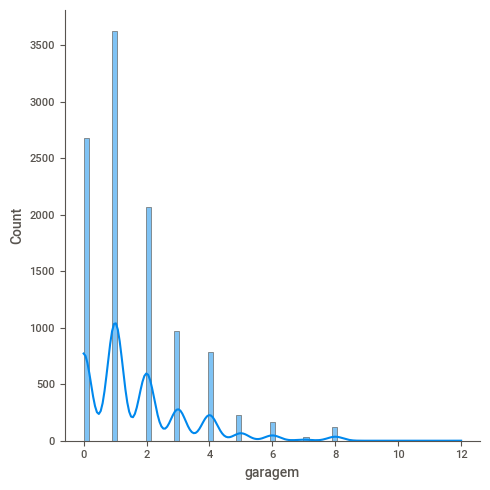

In [102]:
plt.figure(figsize =(6,4))
sns.displot(x = data['garagem'], kde = True)

Existe uma pequena correlação entre o número de vagas de garagem e o valor do aluguel.

# Vamos analisar o seguro incêndio

<AxesSubplot:xlabel='cidade', ylabel='valor_seguro_incendio'>

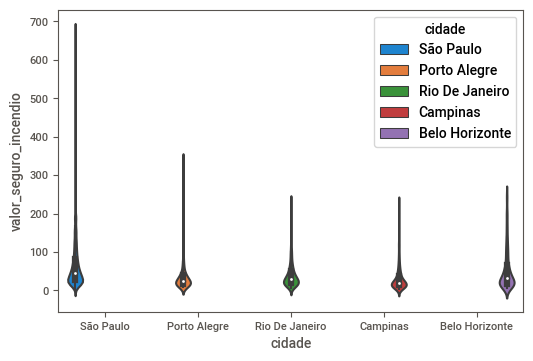

In [103]:
sns.violinplot(x ='cidade', y ='valor_seguro_incendio', data = data,hue ='cidade')

* São Paulo é a cidade com os maiores valores de seguro incêndio, seguido por Porto Alegre, Belo Horizonte, Rio de Janeiro e Campinas.

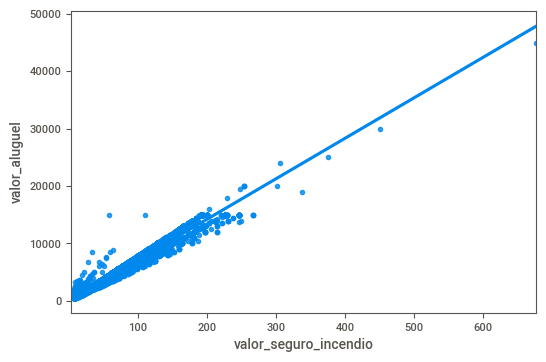

In [104]:
ax = sns.regplot(x = data['valor_seguro_incendio'],y = data['valor_aluguel'])

* Existe uma alta correlação entre o valor do seguro incendio e o valor do aluguel. 
* Quanto maior o valor do seguro incendio maior o valor do aluguel.

# Existe qualquer relação entre o valor do iptu e o valor do aluguel?

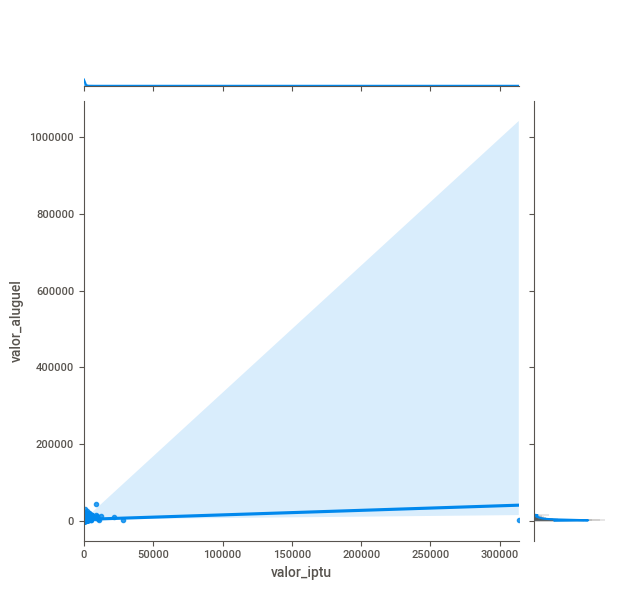

In [105]:
sns.jointplot(y= data['valor_aluguel'],x = data['valor_iptu'],kind ='reg')

* Não temos nenhum impacto

**Pré-processando os dados**

Poucos algoritmos trabalham com dados categóricos, por essas variáveis serem importantes para o nosso modelo precisamos transformar dados categóricos em dados numéricos para poder usar os algoritmos de Machine Learning

Podemos usar duas técnicas bem eficientes que são:

- **Label Encoder**

Basicamente ele substitui a informação por um valor numérico, o grande problema é que os modelos de IA interpretam esses dados em uma ordem (0<1<2) dando um peso maior para o dado categorico representado por um valor maior.

exemplo:

são paulo -> 1
Rio de Janeiro -> 2

Rio de janeiro tem um peso maior que são paulo.


- **One Hot Enconder**

este processo resolve o problema anterio. porém aumenta o tamanho da base de dados, o que o torna difícil de gerenciar para base de dados com grandes quantidades de dados categoricos distintos.

Este método transforma os dados categoricos em colunas e atribuir o valor 1 ou 0 (verdadeiro ou falso). 

exemplo:

é gerado uma colunas chamada São Paulo e todos os dados que correspondem a cidade de São Paulo será atribuído 1, os que não corresponde com São Paulo é atribuído 0.

- Links + info

https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

Verificando a quantidade de valores únicos na coluna estado

In [106]:
data.estado.unique()

array(['SP', 'RS', 'RJ', 'MG'], dtype=object)

Verificando a quantidade de valores únicos na coluna cidade

In [107]:
data.cidade.unique()

array(['São Paulo', 'Porto Alegre', 'Rio De Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

**Aplicando o One Hot Encoder**

Subistituindo o dataframe data pelo dataframe após aplicado o get_dummies()

In [108]:
# get_dummies transforma os dados da coluna aplicando o one hot enconder
data = pd.get_dummies(data, columns=["estado","cidade"], prefix=["estado_","cidade_"])

In [109]:
data.head()

area  num_quartos  num_banheiros  garagem  num_andares  aceita_animais  \
0    70            2              1        1            7               1   
1   320            4              4        0           20               1   
2    80            1              1        1            6               1   
3    51            2              1        0            2               1   
4    25            1              1        0            1               0   

   mobilia  valor_aluguel  valor_condominio  valor_iptu  ...  \
0        1           3300              2065         211  ...   
1        0           4960              1200        1750  ...   
2        0           2800              1000           0  ...   
3        0           1112               270          22  ...   
4        0            800                 0          25  ...   

   mobilia_categorical estado__MG estado__RJ  estado__RS  estado__SP  \
0            mobiliado          0          0           0           1   
1        nao_mobiliado          0          0           0           1   
2        nao_mobiliado          0          0           1           0   
3        nao_mobiliado          0          0           1           0   
4        nao_mobiliado          0          0           0           1   

   cidade__Belo Horizonte  cidade__Campinas  cidade__Porto Alegre  \
0                       0                 0                     0   
1                       0                 0                     0   
2                       0                 0                     1   
3                       0                 0                     1   
4                       0                 0                     0   

   cidade__Rio De Janeiro  cidade__São Paulo  
0                       0                  1  
1                       0                  1  
2                       0                  0  
3                       0                  0  
4                       0                  1  

[5 rows x 22 columns]

In [110]:
data.columns

Index(['area', 'num_quartos', 'num_banheiros', 'garagem', 'num_andares',
       'aceita_animais', 'mobilia', 'valor_aluguel', 'valor_condominio',
       'valor_iptu', 'valor_seguro_incendio', 'animal_categorical',
       'mobilia_categorical', 'estado__MG', 'estado__RJ', 'estado__RS',
       'estado__SP', 'cidade__Belo Horizonte', 'cidade__Campinas',
       'cidade__Porto Alegre', 'cidade__Rio De Janeiro', 'cidade__São Paulo'],
      dtype='object')

# Detecção de Outliers, Machine Learning

Excluindo os atributos categoricos

In [111]:
data.drop(["animal_categorical","mobilia_categorical"], axis=1, inplace=True)

### Outlier Detection

Consiste em detectar valores possivelmente anomálos na nossa base de dados.

Utilizaremos do intervalo interquartil para detectar outliers.

#### Intervalo interquartil (FIQ)

Consiste na quantidade de dispersão no meio.

FiQ = Q3 - Q1

#### Detectando outlier com FIQ

- outlier baixo:

Q1 - (1.5 x FIQ)

- outlier Alto:

Q3 + (1.5 x FiQ)

- Links:

https://pt.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/interquartile-range-iqr/a/interquartile-range-review

https://pt.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule

Verificando os registros anomalos no atributo valor_aluguel

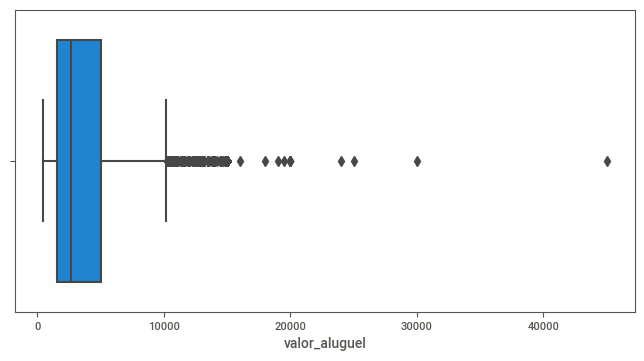

In [112]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['valor_aluguel'])
plt.show()

In [113]:
data.describe()

area   num_quartos  num_banheiros       garagem   num_andares  \
count  10692.000000  10692.000000   10692.000000  10692.000000  10692.000000   
mean     149.217920      2.506079       2.236813      1.609147      5.298167   
std      537.016942      1.171266       1.407198      1.589521      5.888747   
min       11.000000      1.000000       1.000000      0.000000      1.000000   
25%       56.000000      2.000000       1.000000      0.000000      1.000000   
50%       90.000000      2.000000       2.000000      1.000000      3.000000   
75%      182.000000      3.000000       3.000000      2.000000      8.000000   
max    46335.000000     13.000000      10.000000     12.000000    301.000000   

       aceita_animais       mobilia  valor_aluguel  valor_condominio  \
count    10692.000000  10692.000000   10692.000000      1.069200e+04   
mean         0.777778      0.243734    3896.247194      1.174022e+03   
std          0.415759      0.429354    3408.545518      1.559231e+04   
min          0.000000      0.000000     450.000000      0.000000e+00   
25%          1.000000      0.000000    1530.000000      1.700000e+02   
50%          1.000000      0.000000    2661.000000      5.600000e+02   
75%          1.000000      0.000000    5000.000000      1.237500e+03   
max          1.000000      1.000000   45000.000000      1.117000e+06   

          valor_iptu  valor_seguro_incendio    estado__MG    estado__RJ  \
count   10692.000000           10692.000000  10692.000000  10692.000000   
mean      366.704358              53.300879      0.117658      0.140385   
std      3107.832321              47.768031      0.322218      0.347403   
min         0.000000               3.000000      0.000000      0.000000   
25%        38.000000              21.000000      0.000000      0.000000   
50%       125.000000              36.000000      0.000000      0.000000   
75%       375.000000              68.000000      0.000000      0.000000   
max    313700.000000             677.000000      1.000000      1.000000   

         estado__RS    estado__SP  cidade__Belo Horizonte  cidade__Campinas  \
count  10692.000000  10692.000000            10692.000000      10692.000000   
mean       0.111579      0.630378                0.117658          0.079779   
std        0.314862      0.482725                0.322218          0.270964   
min        0.000000      0.000000                0.000000          0.000000   
25%        0.000000      0.000000                0.000000          0.000000   
50%        0.000000      1.000000                0.000000          0.000000   
75%        0.000000      1.000000                0.000000          0.000000   
max        1.000000      1.000000                1.000000          1.000000   

       cidade__Porto Alegre  cidade__Rio De Janeiro  cidade__São Paulo  
count          10692.000000            10692.000000       10692.000000  
mean               0.111579                0.140385           0.550599  
std                0.314862                0.347403           0.497456  
min                0.000000                0.000000           0.000000  
25%                0.000000                0.000000           0.000000  
50%                0.000000                0.000000           1.000000  
75%                0.000000                0.000000           1.000000  
max                1.000000                1.000000           1.000000

Quantil 1 = 25% dos dados.

In [114]:
Q1 = data["valor_aluguel"].quantile(.25)

Quantil 3 = 75% dos dados.

In [115]:
Q3 = data["valor_aluguel"].quantile(.75)

In [116]:
Q1,Q3

(1530.0, 5000.0)

Faixa de Intervalo Interqualítico

In [117]:
IQR = Q3 - Q1

In [118]:
IQR

3470.0

Calculando os limites

In [119]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [120]:
lower,upper

(-3675.0, 10205.0)

Definindo a seleção dos registros

In [121]:
data_clean = data[data['valor_aluguel'] >= lower] 

In [122]:
data_clean = data_clean[data_clean['valor_aluguel'] <= upper]

In [123]:
data_clean.describe()

area  num_quartos  num_banheiros      garagem  num_andares  \
count   9977.000000  9977.000000    9977.000000  9977.000000  9977.000000   
mean     134.480204     2.415957       2.092413     1.466573     5.243460   
std      550.667527     1.122319       1.289368     1.471634     5.842044   
min       11.000000     1.000000       1.000000     0.000000     1.000000   
25%       55.000000     2.000000       1.000000     0.000000     1.000000   
50%       85.000000     2.000000       2.000000     1.000000     3.000000   
75%      160.000000     3.000000       3.000000     2.000000     8.000000   
max    46335.000000    10.000000      10.000000    12.000000   301.000000   

       aceita_animais      mobilia  valor_aluguel  valor_condominio  \
count     9977.000000  9977.000000    9977.000000      9.977000e+03   
mean         0.774882     0.235341    3221.233337      1.068422e+03   
std          0.417681     0.424233    2296.025341      1.585605e+04   
min          0.000000     0.000000     450.000000      0.000000e+00   
25%          1.000000     0.000000    1500.000000      1.910000e+02   
50%          1.000000     0.000000    2500.000000      5.500000e+02   
75%          1.000000     0.000000    4250.000000      1.119000e+03   
max          1.000000     1.000000   10200.000000      1.117000e+06   

          valor_iptu  valor_seguro_incendio   estado__MG   estado__RJ  \
count    9977.000000            9977.000000  9977.000000  9977.000000   
mean      301.399218              43.940664     0.117570     0.144833   
std      3190.804271              32.114269     0.322115     0.351950   
min         0.000000               3.000000     0.000000     0.000000   
25%        34.000000              20.000000     0.000000     0.000000   
50%       110.000000              33.000000     0.000000     0.000000   
75%       307.000000              58.000000     0.000000     0.000000   
max    313700.000000             178.000000     1.000000     1.000000   

        estado__RS   estado__SP  cidade__Belo Horizonte  cidade__Campinas  \
count  9977.000000  9977.000000             9977.000000       9977.000000   
mean      0.117169     0.620427                0.117570          0.083993   
std       0.321638     0.485305                0.322115          0.277391   
min       0.000000     0.000000                0.000000          0.000000   
25%       0.000000     0.000000                0.000000          0.000000   
50%       0.000000     1.000000                0.000000          0.000000   
75%       0.000000     1.000000                0.000000          0.000000   
max       1.000000     1.000000                1.000000          1.000000   

       cidade__Porto Alegre  cidade__Rio De Janeiro  cidade__São Paulo  
count           9977.000000             9977.000000        9977.000000  
mean               0.117169                0.144833           0.536434  
std                0.321638                0.351950           0.498696  
min                0.000000                0.000000           0.000000  
25%                0.000000                0.000000           0.000000  
50%                0.000000                0.000000           1.000000  
75%                0.000000                0.000000           1.000000  
max                1.000000                1.000000           1.000000

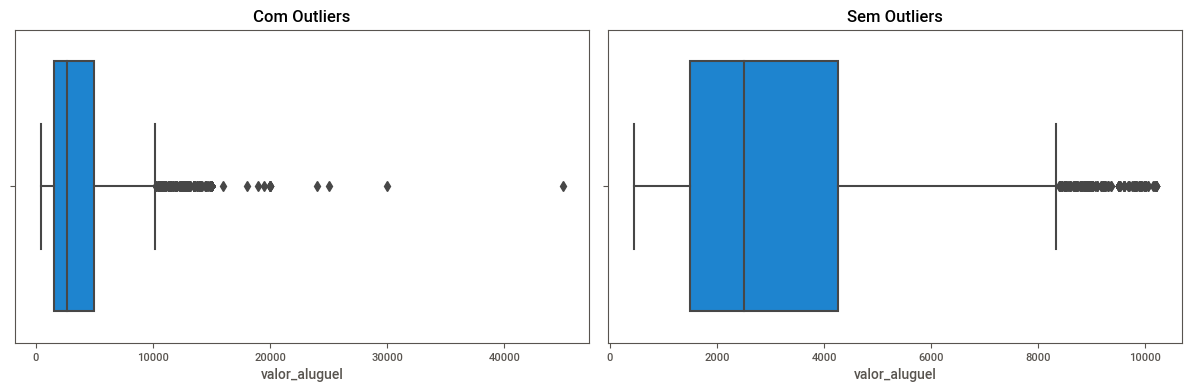

In [124]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title('Com Outliers')
sns.boxplot(x= data['valor_aluguel'])

plt.subplot(1, 2, 2)
plt.title('Sem Outliers')
sns.boxplot(x= data_clean['valor_aluguel'])

plt.tight_layout(pad=1.0)
plt.show()

In [125]:
data_clean.describe()

area  num_quartos  num_banheiros      garagem  num_andares  \
count   9977.000000  9977.000000    9977.000000  9977.000000  9977.000000   
mean     134.480204     2.415957       2.092413     1.466573     5.243460   
std      550.667527     1.122319       1.289368     1.471634     5.842044   
min       11.000000     1.000000       1.000000     0.000000     1.000000   
25%       55.000000     2.000000       1.000000     0.000000     1.000000   
50%       85.000000     2.000000       2.000000     1.000000     3.000000   
75%      160.000000     3.000000       3.000000     2.000000     8.000000   
max    46335.000000    10.000000      10.000000    12.000000   301.000000   

       aceita_animais      mobilia  valor_aluguel  valor_condominio  \
count     9977.000000  9977.000000    9977.000000      9.977000e+03   
mean         0.774882     0.235341    3221.233337      1.068422e+03   
std          0.417681     0.424233    2296.025341      1.585605e+04   
min          0.000000     0.000000     450.000000      0.000000e+00   
25%          1.000000     0.000000    1500.000000      1.910000e+02   
50%          1.000000     0.000000    2500.000000      5.500000e+02   
75%          1.000000     0.000000    4250.000000      1.119000e+03   
max          1.000000     1.000000   10200.000000      1.117000e+06   

          valor_iptu  valor_seguro_incendio   estado__MG   estado__RJ  \
count    9977.000000            9977.000000  9977.000000  9977.000000   
mean      301.399218              43.940664     0.117570     0.144833   
std      3190.804271              32.114269     0.322115     0.351950   
min         0.000000               3.000000     0.000000     0.000000   
25%        34.000000              20.000000     0.000000     0.000000   
50%       110.000000              33.000000     0.000000     0.000000   
75%       307.000000              58.000000     0.000000     0.000000   
max    313700.000000             178.000000     1.000000     1.000000   

        estado__RS   estado__SP  cidade__Belo Horizonte  cidade__Campinas  \
count  9977.000000  9977.000000             9977.000000       9977.000000   
mean      0.117169     0.620427                0.117570          0.083993   
std       0.321638     0.485305                0.322115          0.277391   
min       0.000000     0.000000                0.000000          0.000000   
25%       0.000000     0.000000                0.000000          0.000000   
50%       0.000000     1.000000                0.000000          0.000000   
75%       0.000000     1.000000                0.000000          0.000000   
max       1.000000     1.000000                1.000000          1.000000   

       cidade__Porto Alegre  cidade__Rio De Janeiro  cidade__São Paulo  
count           9977.000000             9977.000000        9977.000000  
mean               0.117169                0.144833           0.536434  
std                0.321638                0.351950           0.498696  
min                0.000000                0.000000           0.000000  
25%                0.000000                0.000000           0.000000  
50%                0.000000                0.000000           1.000000  
75%                0.000000                0.000000           1.000000  
max                1.000000                1.000000           1.000000

Unificando os dataframes

In [126]:
data = data_clean

# Machine Learning

Separando os dados em features e classes.

In [127]:
y = data['valor_aluguel']
x = data.drop(['valor_aluguel'],axis =1)

Separando os conjuntos de treino e teste.

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [129]:
# função para calcular os resultados dos algoritmos
def calcula_metricas(y_test,preds):
    print('MAE:', mean_absolute_error(y_test, preds))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, preds)))
    print('R2:', r2_score(y_test, preds))

In [130]:
# Separando para conjunto de testes e de treino
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size =0.3)

In [131]:
acc=[]

### Calculando a nossa Baseline

Baseline é uma referência usada para comparar valores passados e presentes, dessa forma a empresa pode ter uma base para seus valores futuros.

nas células a baixo a gente cria um modelo simulando uma baseline, utilizando a média.

nosso objetivo e tornar nossos algoritmos mais eficientes que a baseline.

In [132]:
from sklearn.dummy import DummyRegressor

In [133]:
model = DummyRegressor(strategy="mean")

Iniciando o treinamento.

In [134]:
model.fit(X_train,y_train)

DummyRegressor()

Fazendo as predições

In [135]:
preds = model.predict(X_test)

Calculando as métricas.

In [136]:
calcula_metricas(y_test,preds)

MAE: 1785.4153091614512
RMSE: 2257.633707071097
R2: -0.00014721662458905271


Armazendo o resultado.

In [137]:
acc.append(
            [
              'BAS', r2_score(y_test,preds)
            ]
          )

In [138]:
acc

[['BAS', -0.00014721662458905271]]

### Treinando um modelo de Regressão Linear

Basicamente esse modelo consiste em uma equação para estimar o valor esperado de y. esse modelo considera que a relação da resposta às variáveis é uma função linear de alguns parâmetros.

Esse modelo considera uma variável dependente (geralmente representada por y) e as variáveis independente.

- Regressão linear simples:

Considera apenas uma variável independente em relação a variavel dependente.

- Regressão linear múltipla

Considera duas ou mais variáveis independentes em relação a variavel dependente.

- links + info

https://oestatistico.com.br/regressao-linear-simples/

https://pt.wikipedia.org/wiki/Regress%C3%A3o_linear

Instanciando o estimator.

In [139]:
from sklearn.linear_model import LinearRegression

In [140]:
model = LinearRegression()

Iniciando o treinamento.

In [141]:
model.fit(X_train,y_train)

LinearRegression()

Fazendo as predições

In [142]:
preds = model.predict(X_test)

Calculando as métricas.

In [143]:
calcula_metricas(y_test,preds)

MAE: 247.50399981239568
RMSE: 724.2489066936765
R2: 0.8970722057212352


Armazendo o resultado.

In [144]:
acc.append(
            [
              'LIR', r2_score(y_test,preds)
            ]
          )

In [145]:
acc

[['BAS', -0.00014721662458905271], ['LIR', 0.8970722057212352]]

### Decision Tree Regression

Este Modelo é baseado em uma árvore de decisão. onde existe a "raiz"(variável target) que gera varios "nós", cada nó segue caminhos diferentes de acordo com o resultado da decisão, esses caminhos são titulado de "ramos". 

Basicamente o algoritmo realiza perguntas de sim ou não, que gera um nó de acordo com a resposta, e assim gera um fluxo formando a árvore de decisão.

Com isso esse algoritmo é muito util para previsões de classe, e consegue utilizar dados categóricos 

#### Entropia 

Quanto maior a entropia, maior a desordem dos dados; E quanto menor, maior será a ordem destes dados em relação a variavel target. Partindo da entropia, o algoritmo confere o ganho de informação de cada variável. Aquela que apresentar maior ganho de informação será a variável do primeiro nó da árvores.

#### regressão 

Nos problemas de regressão nosso objetivo é prever um valor, e não uma classe. Para isso a árvore utilizará os conceitos de média e desvio padrão, que possibilitarão um resultado final numérico.

- links + info

https://didatica.tech/como-funciona-o-algoritmo-arvore-de-decisao/

https://medium.com/turing-talks/turing-talks-17-modelos-de-predi%C3%A7%C3%A3o-decision-tree-610aa484cb05

In [146]:
from sklearn.tree import DecisionTreeRegressor

Iniciando o treinamento.

In [147]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

Fazendo as predições

In [148]:
preds = model.predict(X_test)

Calculando as métricas.

In [149]:
calcula_metricas(y_test,preds)

MAE: 71.25372968158538
RMSE: 272.0935748508192
R2: 0.9854724110697476


Armazendo o resultado.

In [150]:
acc.append(['DTR',r2_score(y_test,preds)])

In [151]:
acc

[['BAS', -0.00014721662458905271],
 ['LIR', 0.8970722057212352],
 ['DTR', 0.9854724110697476]]

### Random Forest

Este algoritmo se comporta de maneira parecida com o anterior. algumas diferenças são a criação de muitas árvores de decisão. Basicamente ele seleciona duas ou mais variáveis aleatórias (diferente do anterior que seleciona as váriaveis em sua totalidade) e utilizando o metodo de entropia ou de índice Gini ele seleciona quais dessa variáveis aleatorias será escolhida para compor o nó da raiz, basicamente o modelo segue assim sempre excluindo as váriaveis  já selecionadas até formar a árvore de decisão.

Cada árvore criada irá apresentar o seu resultado, sendo que em problemas de regressão será realizada a média dos valores previstos, e esta média informada como resultado final, e em problemas de classificação o resultado que mais vezes foi apresentado será o escolhido.

- Links + info

https://didatica.tech/o-que-e-e-como-funciona-o-algoritmo-randomforest/

In [152]:
from sklearn.ensemble import RandomForestRegressor

Iniciando o treinamento.

In [103]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

Fazendo as predições

In [104]:
preds = model.predict(X_test)

Calculando as métricas.

In [105]:
calcula_metricas(y_test,preds)

MAE: 69.45334782528019
RMSE: 195.25663914920383
R2: 0.992763365272101


Armazendo o resultado.

In [106]:
acc.append(['RFN',r2_score(y_test,model.predict(X_test))])

In [107]:
acc

[['BAS', -1.721272783639094e-06],
 ['LIR', -0.4285732985178765],
 ['DTR', 0.9873549327341208],
 ['RFN', 0.992763365272101]]

### KNN Regressor

Esse Modelo basicamente Prevê comparando o quão similar os dados de treinamento são com os dados informados para a previsão.

Para realizar a previsão ele usa cálculos matemáticos (Euclidiana, Manhattan, Minkowski, Ponderada) para verificar o quão similar esse dados informados são com os dados usados no treinamento do modelo.

- Links + info

https://medium.com/brasil-ai/knn-k-nearest-neighbors-1-e140c82e9c4e

In [153]:
from sklearn.neighbors import KNeighborsRegressor

Iniciando o treinamento.

In [154]:
model = KNeighborsRegressor()
model.fit(X_train,y_train)

KNeighborsRegressor()

Fazendo as predições

In [155]:
preds = model.predict(X_test)

Calculando as métricas.

In [156]:
calcula_metricas(y_test,preds)

MAE: 670.7141616566466
RMSE: 1042.6472943558247
R2: 0.7866798842583882


Armazendo o resultado.

In [157]:
acc.append(['KNNR',r2_score(y_test,model.predict(X_test))])

In [158]:
acc

[['BAS', -0.00014721662458905271],
 ['LIR', 0.8970722057212352],
 ['DTR', 0.9854724110697476],
 ['KNNR', 0.7866798842583882]]

Ordenando os resultados.

In [159]:
acc.sort(key = lambda y:y[1],reverse =True)

In [160]:
acc

[['DTR', 0.9854724110697476],
 ['LIR', 0.8970722057212352],
 ['KNNR', 0.7866798842583882],
 ['BAS', -0.00014721662458905271]]

## Pycaret

Essa Biblioteca ajuda a selecionar qual melhor modelo para as previsões, dentre outras diversas funções.

In [119]:
!pip install pycaret==2.2

In [161]:
connect_dw_imoveis = sqlite3.connect("../data/imoveis_dw.db")

In [162]:
data2 = pd.read_sql_query(r"""
    SELECT * FROM IMOVEIS
    """, 
    connect_dw_imoveis
    )

In [163]:
data2.head()

cidade estado  area  num_quartos  num_banheiros  garagem  \
0     São Paulo     SP    70            2              1        1   
1     São Paulo     SP   320            4              4        0   
2  Porto Alegre     RS    80            1              1        1   
3  Porto Alegre     RS    51            2              1        0   
4     São Paulo     SP    25            1              1        0   

   num_andares  aceita_animais  mobilia  valor_aluguel  valor_condominio  \
0            7               1        1           3300              2065   
1           20               1        0           4960              1200   
2            6               1        0           2800              1000   
3            2               1        0           1112               270   
4            1               0        0            800                 0   

   valor_iptu  valor_seguro_incendio  
0         211                     42  
1        1750                     63  
2           0                     41  
3          22                     17  
4          25                     11

In [164]:
from pycaret.regression import *

In [165]:
s = setup( data2
          ,target = 'valor_aluguel'
          ,numeric_features = [ 'num_quartos'
                               ,'num_banheiros'
                               ,'garagem'
                               ,'num_andares'
                               ,'aceita_animais'
                               ,'mobilia']
          ,log_experiment = True
          ,experiment_name = 'exp-bootcamp'
         )

### Validação cruzada k-fold

para treinar o modelo e evitar problemas de overfitting, o conjunto de dados é dividido em partes, e então usa a primeira parte para testar e o resto para treinar, depois ele realiza outro treinamento agora com a segunda parte para teste e o resto (incluindo a primeira parte) para treinamento, ele continua assim de forma que todos os dados foram usados tanto para teste como para treinamento.

Fold = representa em quantas partes o modelo será dividido

- Links + info

https://drigols.medium.com/introdu%C3%A7%C3%A3o-a-valida%C3%A7%C3%A3o-cruzada-k-fold-2a6bced32a90

Comparando os modelos 

In [166]:
best = compare_models(fold = 5)

Listando os modelos

In [167]:
models()

Name  \
ID                                            
lr                        Linear Regression   
lasso                      Lasso Regression   
ridge                      Ridge Regression   
en                              Elastic Net   
lar                  Least Angle Regression   
llar           Lasso Least Angle Regression   
omp             Orthogonal Matching Pursuit   
br                           Bayesian Ridge   
ard       Automatic Relevance Determination   
par            Passive Aggressive Regressor   
ransac              Random Sample Consensus   
tr                       TheilSen Regressor   
huber                       Huber Regressor   
kr                             Kernel Ridge   
svm               Support Vector Regression   
knn                   K Neighbors Regressor   
dt                  Decision Tree Regressor   
rf                  Random Forest Regressor   
et                    Extra Trees Regressor   
ada                      AdaBoost Regressor   
gbr             Gradient Boosting Regressor   
mlp                           MLP Regressor   
xgboost           Extreme Gradient Boosting   
lightgbm    Light Gradient Boosting Machine   
catboost                 CatBoost Regressor   

                                                  Reference  Turbo  
ID                                                                  
lr              sklearn.linear_model._base.LinearRegression   True  
lasso        sklearn.linear_model._coordinate_descent.Lasso   True  
ridge                     sklearn.linear_model._ridge.Ridge   True  
en        sklearn.linear_model._coordinate_descent.Elast...   True  
lar                  sklearn.linear_model._least_angle.Lars   True  
llar            sklearn.linear_model._least_angle.LassoLars   True  
omp       sklearn.linear_model._omp.OrthogonalMatchingPu...   True  
br                sklearn.linear_model._bayes.BayesianRidge   True  
ard               sklearn.linear_model._bayes.ARDRegression  False  
par       sklearn.linear_model._passive_aggressive.Passi...   True  
ransac         sklearn.linear_model._ransac.RANSACRegressor  False  
tr        sklearn.linear_model._theil_sen.TheilSenRegressor  False  
huber            sklearn.linear_model._huber.HuberRegressor   True  
kr                         sklearn.kernel_ridge.KernelRidge  False  
svm                                sklearn.svm._classes.SVR  False  
knn       sklearn.neighbors._regression.KNeighborsRegressor   True  
dt              sklearn.tree._classes.DecisionTreeRegressor   True  
rf           sklearn.ensemble._forest.RandomForestRegressor   True  
et             sklearn.ensemble._forest.ExtraTreesRegressor   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostRegr...   True  
gbr          sklearn.ensemble._gb.GradientBoostingRegressor   True  
mlp            pycaret.internal.tunable.TunableMLPRegressor  False  
xgboost                        xgboost.sklearn.XGBRegressor   True  
lightgbm                     lightgbm.sklearn.LGBMRegressor   True  
catboost                    catboost.core.CatBoostRegressor   True

Selecionando o melhor algoritmo

In [170]:
catboost = create_model('catboost', fold = 5)

Otimizando o modelo

a célula a baixo ajusta os parâmetros do modelo, para torna-lo mais eficiente

In [171]:
tuned_et = tune_model(catboost,fold=5)

Visualizando os residuais

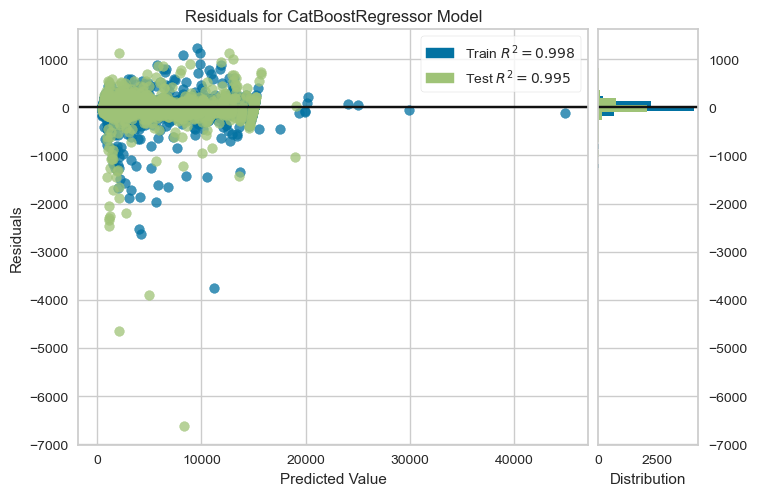

In [172]:
plot_model(catboost)

Visualizando o erro do modelo

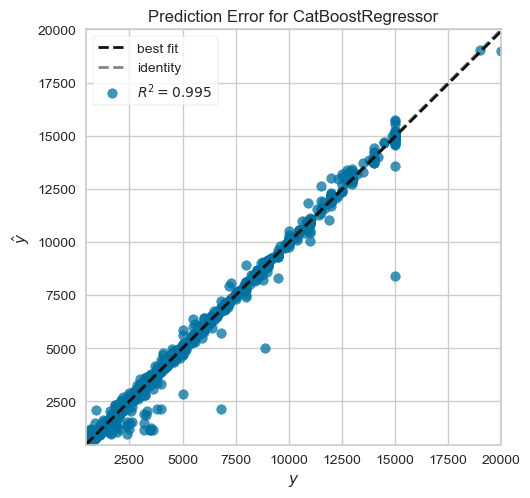

In [173]:
plot_model(catboost, plot = 'error')

Visualizando as features importantes

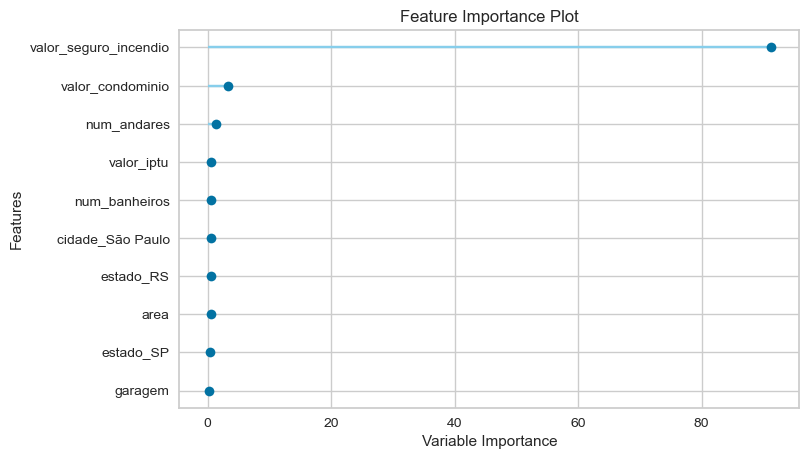

In [174]:
plot_model(catboost, plot='feature')

Finaliza o modelo

In [175]:
final_catboost = finalize_model(catboost)

Salva o modelo

In [177]:
save_model(final_catboost,'modelo-final')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['num_quartos',
                                                           'num_banheiros',
                                                           'garagem',
                                                           'num_andares',
                                                           'aceita_animais',
                                                           'mobilia'],
                                       target='valor_aluguel',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy=...
                 ('cluster_all', 'passthrough'),
                 ('dummy', 

In [2]:
!ls

'ls' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.


### Test Time

In [178]:
model_test = load_model('modelo-final')

Transformation Pipeline and Model Successfully Loaded


In [179]:
data_teste = data2.drop(["valor_aluguel"],axis=1)

In [181]:
predict_model(model_test, data=data_teste)

cidade estado  area  num_quartos  num_banheiros  garagem  \
0           São Paulo     SP    70            2              1        1   
1           São Paulo     SP   320            4              4        0   
2        Porto Alegre     RS    80            1              1        1   
3        Porto Alegre     RS    51            2              1        0   
4           São Paulo     SP    25            1              1        0   
...               ...    ...   ...          ...            ...      ...   
10687    Porto Alegre     RS    63            2              1        1   
10688       São Paulo     SP   285            4              4        4   
10689  Rio De Janeiro     RJ    70            3              3        0   
10690  Rio De Janeiro     RJ   120            2              2        2   
10691       São Paulo     SP    80            2              1        0   

       num_andares  aceita_animais  mobilia  valor_condominio  valor_iptu  \
0                7               1        1              2065         211   
1               20               1        0              1200        1750   
2                6               1        0              1000           0   
3                2               1        0               270          22   
4                1               0        0                 0          25   
...            ...             ...      ...               ...         ...   
10687            5               0        1               402          24   
10688           17               1        0              3100         973   
10689            8               0        1               980         332   
10690            8               1        1              1585         279   
10691            1               1        0                 0         165   

       valor_seguro_incendio         Label  
0                         42   3344.074031  
1                         63   5259.873286  
2                         41   2762.671105  
3                         17   1115.958538  
4                         11    764.174869  
...                      ...           ...  
10687                     22   1489.952696  
10688                    191  15011.026942  
10689                     78   6126.226938  
10690                    155  12024.075831  
10691                     22   1501.615656  

[10692 rows x 13 columns]